# 1- Análise Descritiva:

## Limpeza dos Dados:
### Dados Nulos:
#### Apenas na coluna VALOR_TOTAL, que veio vazia.
## Dados Duplicados:
#### Foram encontrados 4 registros duplicados.
## Descrição das Tabelas:
### ITEM_PEDIDO-_2_.xlsx:
#### Contém o ID da compra, ID do item e a quantidade vendida.
### ITENS-_3_.xlsx:
#### Contém o ID do item e o preço, mas veio sem nome nas colunas. Presume-se que uma das colunas é o preço.
### PEDIDO-_1_.xlsx:
#### Contém o ID do pedido, data da venda e valor da venda, que veio vazio.

# 2- Análise Exploratória:
## Produtos Mais Vendidos em Quantidade:
### Item D: 251 unidades vendidas.
## Produto que Gerou Mais Receita:
### Item D , apoximadamente 40% da receita total.
## Mês com Maior Receita:
### Julho, com destaque para o item D.
## Semana com Maior Receita:
### Semana 29, com destaque para o item D.
## Dia da Semana com Maior Receita:
### Domingo, com destaque para o item D.
## Comportamento dos Itens nas Compras:
### Todos os itens possuem a mesma mediana de 3 pedidos por venda.
## Distribuição dos Valores de Cada Pedido:
### A distribuição do preço é uma curva não normal, com uma longa cauda. Moda, média e mediana estão próximas.
## Range de Pedidos Diários:
### Entre 1 e 5 pedidos.
## Vendas Estão Aumentando?
### Visualmente, a série temporal não indica aumento nas vendas.
## Combinações Mais Pedidas:
### (item B, item D): 28 vezes
### (item A, item C): 27 vezes
### (item C, item D): 26 vezes
### (item B, item C): 22 vezes
### (item A, item D): 22 vezes
### Sugestão:
### Oferecer combos ou descontos nas combinações mais pedidas.
## Correlação entre Receita e Média Diária de Vendas:
### Correlação muito leve e negativa por Spearman (-0.04).

# 3- Análise Estatística:
## Testes de Estacionaridade:
### Ambas as séries temporais, MEDIA_PEDIDOS e MEDIA_VALOR_TOTAL, são estacionárias com base nos testes ADF e KPSS. Isso indica médias e variâncias constantes ao longo do tempo, condição desejável para muitas análises e modelos de previsão.

# Observações:
## Problemas nos Dados:
### A tabela PEDIDO-_1_.xlsx veio com índice quebrado, ou seja, faltam linhas.
### A tabela ITENS-_3_.xlsx veio sem nomes nas colunas.
### Não há muitos dados para aplicar um modelo robusto, então a escolha do modelo deve ser baseada em desempenho com poucos dados.
### Utilizar o número da semana e o número do mês no modelo.
## Formato dos Dados:
### Os dados estão em formato .xlsx e não .csv, como informado inicialmente.

In [85]:
import pandas as pd

df_item_pedido = pd.read_excel("/Users/marcobispo/Documents/desafio_datalakers-/ITEM_PEDIDO-_2_ _.xlsx")
if 'Unnamed: 0' in df_item_pedido.columns:
    df_item_pedido = df_item_pedido.drop(columns=['Unnamed: 0'])
display(df_item_pedido.head(2))
display(df_item_pedido.info())

df_item_3 = pd.read_excel("/Users/marcobispo/Documents/desafio_datalakers-/ITENS-_3___.xlsx")
df_item_3 = df_item_3.rename(columns={
    'Unnamed: 0':'ID_ITEM',	
    0:'PRECO'
})
display(df_item_3.head(2))
display(df_item_3.info())

df_pedido_1 = pd.read_excel("/Users/marcobispo/Documents/desafio_datalakers-/PEDIDO-_1__.xlsx")
if 'Unnamed: 0' in df_pedido_1.columns:
    df_pedido_1 = df_pedido_1.drop(columns=['Unnamed: 0'])
display(df_pedido_1.head(2))
display(df_pedido_1.info())

df_join1 = df_item_pedido.merge(df_item_3, on='ID_ITEM', how='left')
df_join2 = df_join1.merge(df_pedido_1, on='ID_PEDIDO', how='left')
df_join2['VALOR_TOTAL'] = df_join2['QUANTIDADE'] * df_join2["PRECO"]
df = df_join2

traducao_dias = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df['DATA'] = pd.to_datetime(df['DATA'], format='%Y-%m-%d')
df.sort_values(by='DATA')
df['DIA DA SEMANA'] = df['DATA'].dt.day_name()
df['DIA DA SEMANA'] = df['DIA DA SEMANA'].replace(traducao_dias)
df["NUMERO DA SEMANA"] = df['DATA'].dt.isocalendar().week
df['NUMERO DO MES'] = df['DATA'].dt.month
total_duplicados = df.duplicated().sum()
print("Total de duplicados:", total_duplicados)
df

,ID_PEDIDO,ID_ITEM,QUANTIDADE
0,120210601,item C,4
1,220210601,item A,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_PEDIDO   295 non-null    int64 
 1   ID_ITEM     295 non-null    object
 2   QUANTIDADE  295 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ KB


None

,ID_ITEM,PRECO
0,item A,10
1,item B,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID_ITEM  4 non-null      object
 1   PRECO    4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


None

,ID_PEDIDO,DATA,VALOR_TOTAL
0,120210601,2021-06-01,NaN
1,220210601,2021-06-01,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_PEDIDO    181 non-null    int64  
 1   DATA         181 non-null    object 
 2   VALOR_TOTAL  0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


None

Total de duplicados: 4


,ID_PEDIDO,ID_ITEM,QUANTIDADE,PRECO,DATA,VALOR_TOTAL,DIA DA SEMANA,NUMERO DA SEMANA,NUMERO DO MES
0,120210601,item C,4,20,2021-06-01,80,Terça-feira,22,6
1,220210601,item A,3,10,2021-06-01,30,Terça-feira,22,6
2,320210604,item C,1,20,2021-06-04,20,Sexta-feira,22,6
3,420210604,item B,4,15,2021-06-04,60,Sexta-feira,22,6
4,420210604,item C,2,20,2021-06-04,40,Sexta-feira,22,6
...,...,...,...,...,...,...,...,...,...
290,14520210831,item C,5,20,2021-08-31,100,Terça-feira,35,8
291,14520210831,item A,3,10,2021-08-31,30,Terça-feira,35,8
292,14620210901,item D,2,25,2021-09-01,50,Quarta-feira,35,9
293,14720210901,item A,1,10,2021-09-01,10,Quarta-feira,35,9


/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_50305/1774747169.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ID_ITEM', y='VALOR_TOTAL', data=item_totals, palette='Blues_d')


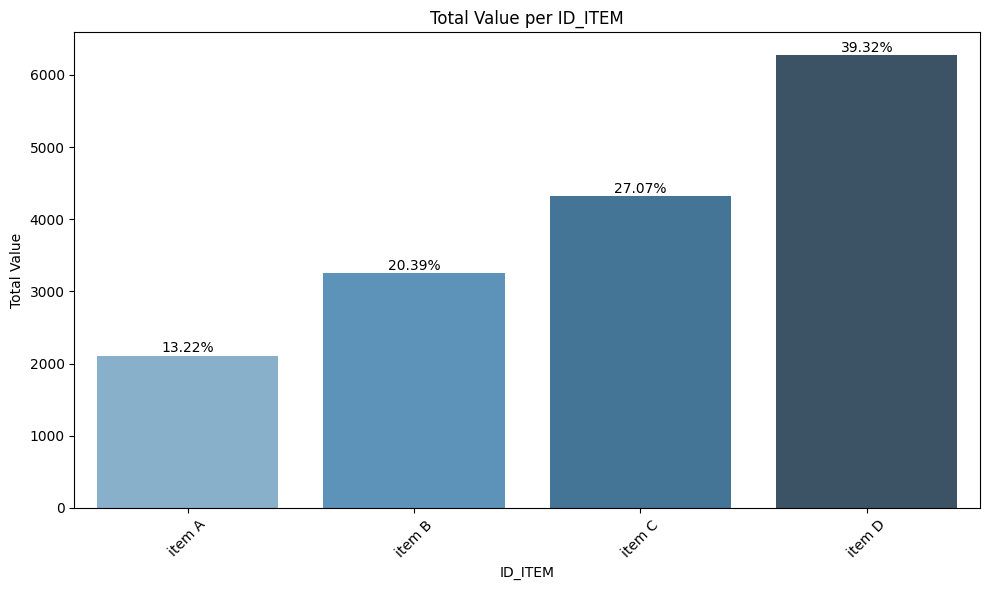

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named df
# Group by ID_ITEM and sum VALOR_TOTAL
item_totals = df.groupby('ID_ITEM')['VALOR_TOTAL'].sum().reset_index()

# Calculate percentage contribution
item_totals['Percentage'] = (item_totals['VALOR_TOTAL'] / item_totals['VALOR_TOTAL'].sum()) * 100

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='ID_ITEM', y='VALOR_TOTAL', data=item_totals, palette='Blues_d')
plt.xlabel('ID_ITEM')
plt.ylabel('Total Value')
plt.title('Total Value per ID_ITEM')
plt.xticks(rotation=45)

# Adding annotations for percentage
for index, row in item_totals.iterrows():
    plt.text(index, row['VALOR_TOTAL'] + 5, f'{row["Percentage"]:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


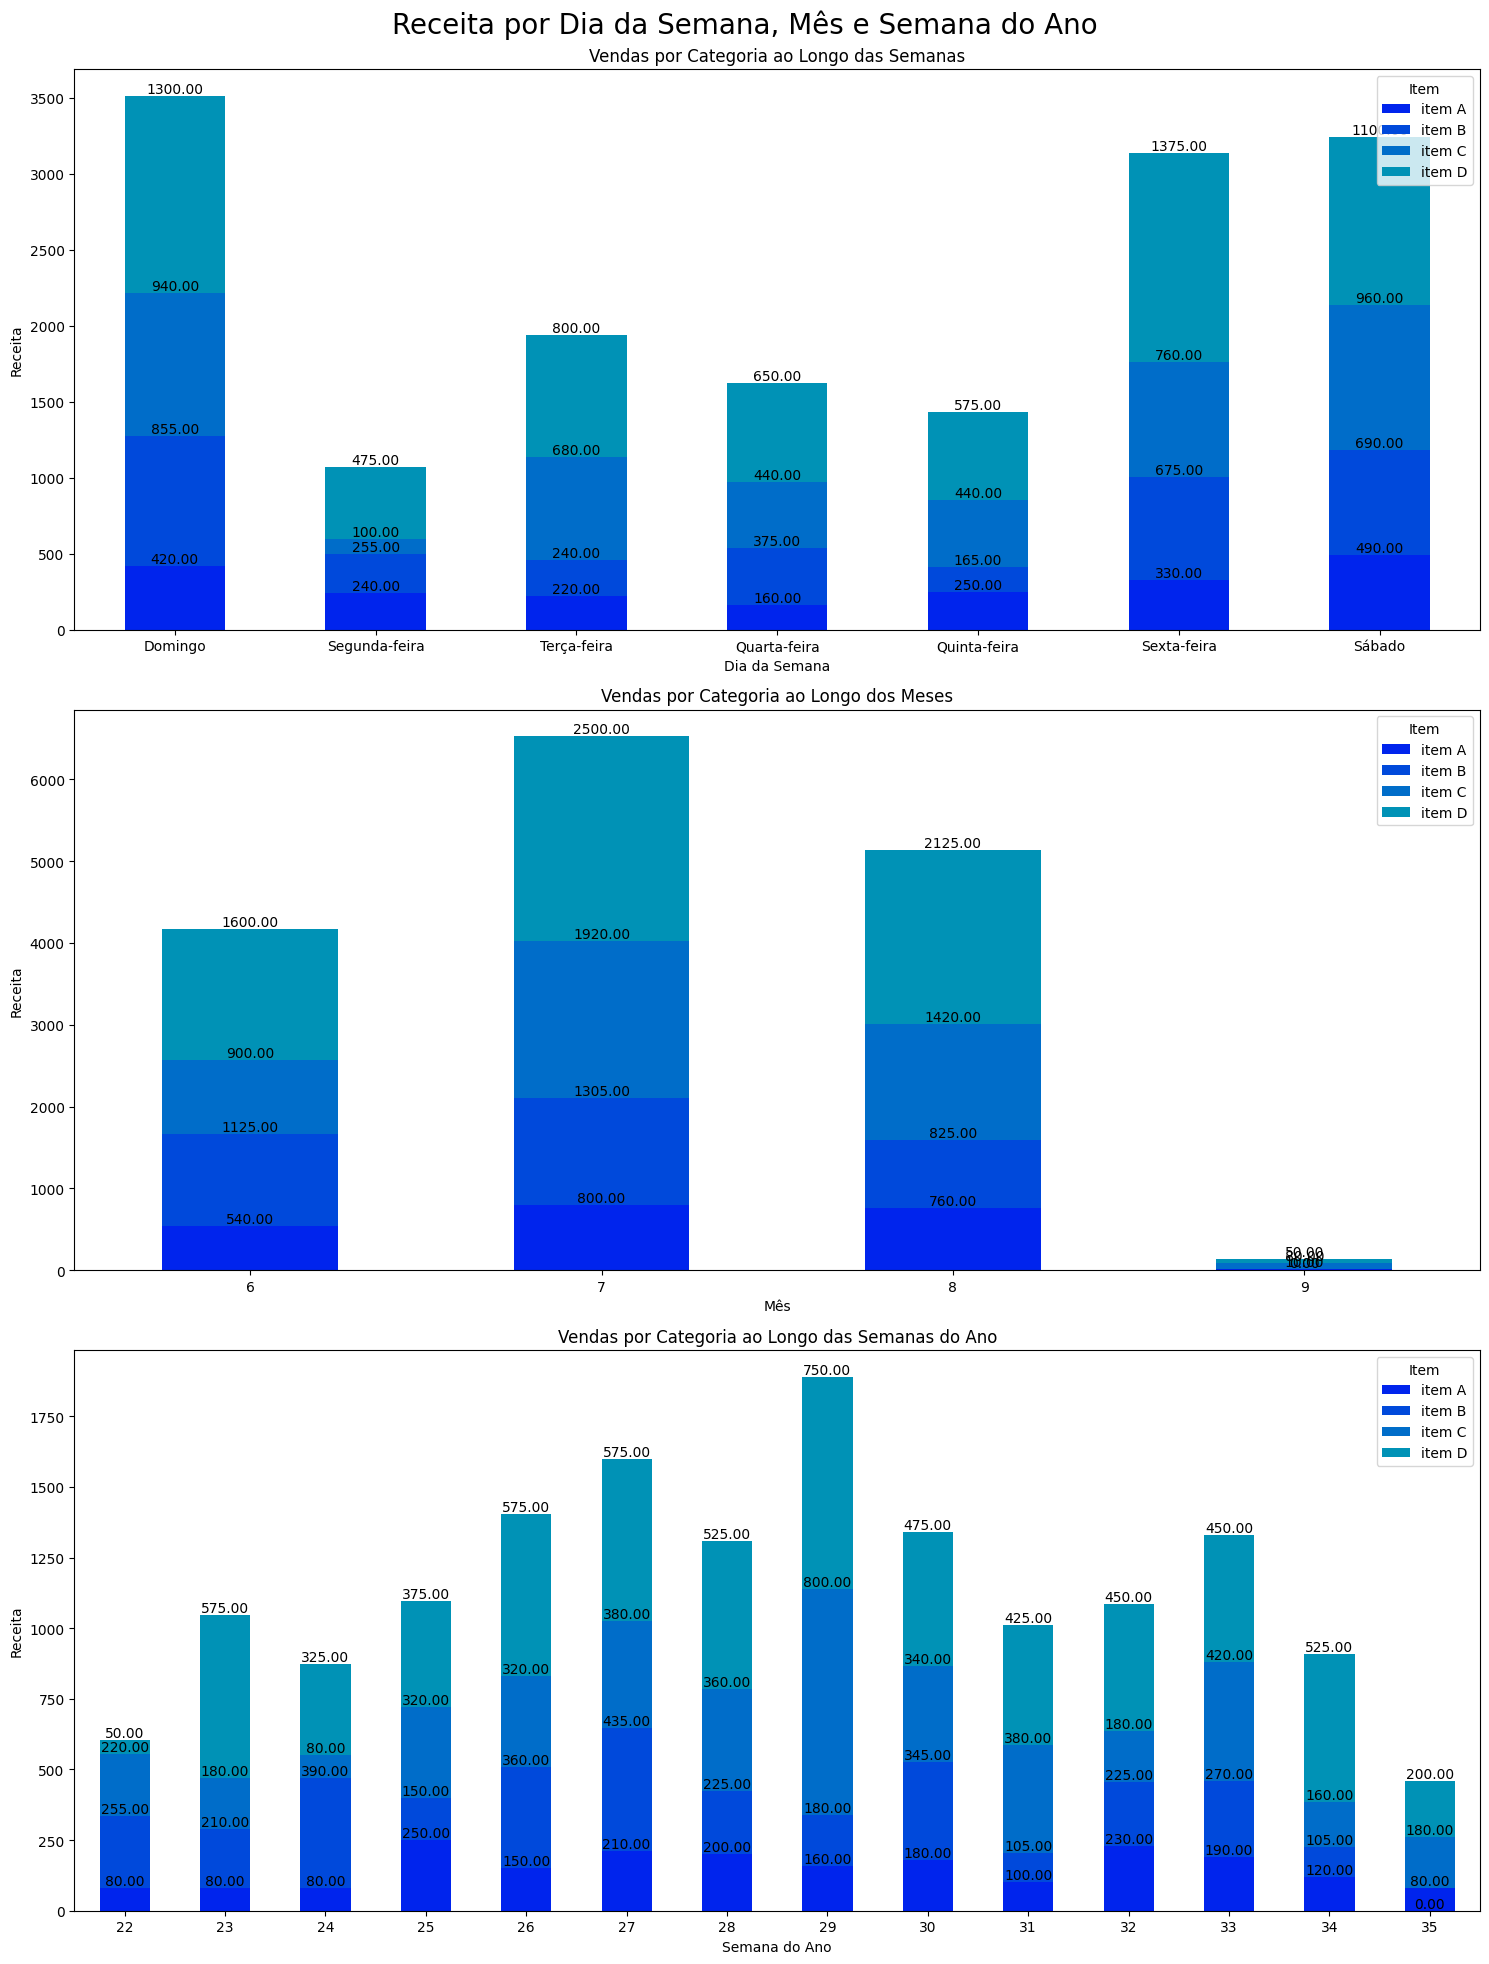

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Supondo que 'df' seja o seu DataFrame com os dados
warnings.filterwarnings('ignore', message="The default value of observed=False is deprecated.*")
# Defina os dias da semana na ordem desejada
dias_da_semana = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
sns.set_palette(sns.color_palette("winter"))
# Crie a figura com subplots
plt.figure(figsize=(15, 20))

# Subplot 1: Vendas por categoria ao longo das semanas
plt.subplot(3, 1, 1)
df['DIA DA SEMANA'] = pd.Categorical(df['DIA DA SEMANA'], categories=dias_da_semana, ordered=True)
total_por_semana = df.groupby(['DIA DA SEMANA', 'ID_ITEM'], observed=False)['VALOR_TOTAL'].sum().reset_index().sort_values(by='VALOR_TOTAL')
total_por_semana_pivot = total_por_semana.pivot_table(index='DIA DA SEMANA', columns='ID_ITEM', values='VALOR_TOTAL', aggfunc='sum', fill_value=0)
bars = total_por_semana_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Dia da Semana')
plt.xticks(rotation=0)
plt.ylabel('Receita')
plt.title('Vendas por Categoria ao Longo das Semanas')
plt.legend(title='Item', loc='upper right')

# Adicionar valores nas barras
for bar in bars.patches:
    # Posição x e y da barra
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height()
    # Formatar o valor como desejado (nesse caso, como float com 2 casas decimais)
    label = '{:.2f}'.format(bar.get_height())
    # Adicionar o texto no local desejado com alguma compensação y
    plt.annotate(label, (x, y), ha='center', va='bottom')

# Subplot 2: Vendas por categoria ao longo dos meses
plt.subplot(3, 1, 2)
total_por_mes = df.groupby(['NUMERO DO MES', 'ID_ITEM'])['VALOR_TOTAL'].sum().reset_index().sort_values(by='VALOR_TOTAL')
total_por_mes_pivot = total_por_mes.pivot_table(index='NUMERO DO MES', columns='ID_ITEM', values='VALOR_TOTAL', aggfunc='sum', fill_value=0)
bars = total_por_mes_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Mês')
plt.xticks(rotation=0)
plt.ylabel('Receita')
plt.title('Vendas por Categoria ao Longo dos Meses')
plt.legend(title='Item', loc='upper right')

# Adicionar valores nas barras
for bar in bars.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height()
    label = '{:.2f}'.format(bar.get_height())
    plt.annotate(label, (x, y), ha='center', va='bottom')

# Subplot 3: Vendas por categoria ao longo das semanas do ano
plt.subplot(3, 1, 3)
total_por_semana_ano = df.groupby(['NUMERO DA SEMANA', 'ID_ITEM'])['VALOR_TOTAL'].sum().reset_index().sort_values(by='VALOR_TOTAL')
total_por_semana_ano_pivot = total_por_semana_ano.pivot_table(index='NUMERO DA SEMANA', columns='ID_ITEM', values='VALOR_TOTAL', aggfunc='sum', fill_value=0)
bars = total_por_semana_ano_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Semana do Ano')
plt.ylabel('Receita')
plt.title('Vendas por Categoria ao Longo das Semanas do Ano')
plt.legend(title='Item', loc='upper right')
plt.xticks(rotation=0)

# Adicionar valores nas barras
for bar in bars.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height()
    label = '{:.2f}'.format(bar.get_height())
    plt.annotate(label, (x, y), ha='center', va='bottom')

# Título geral para toda a figura
plt.suptitle("Receita por Dia da Semana, Mês e Semana do Ano", fontsize=20)

# Ajuste de layout
plt.tight_layout()

# Exibir a figura
plt.subplots_adjust(top=0.95)
plt.show()

/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_50305/1571476048.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ID_ITEM')


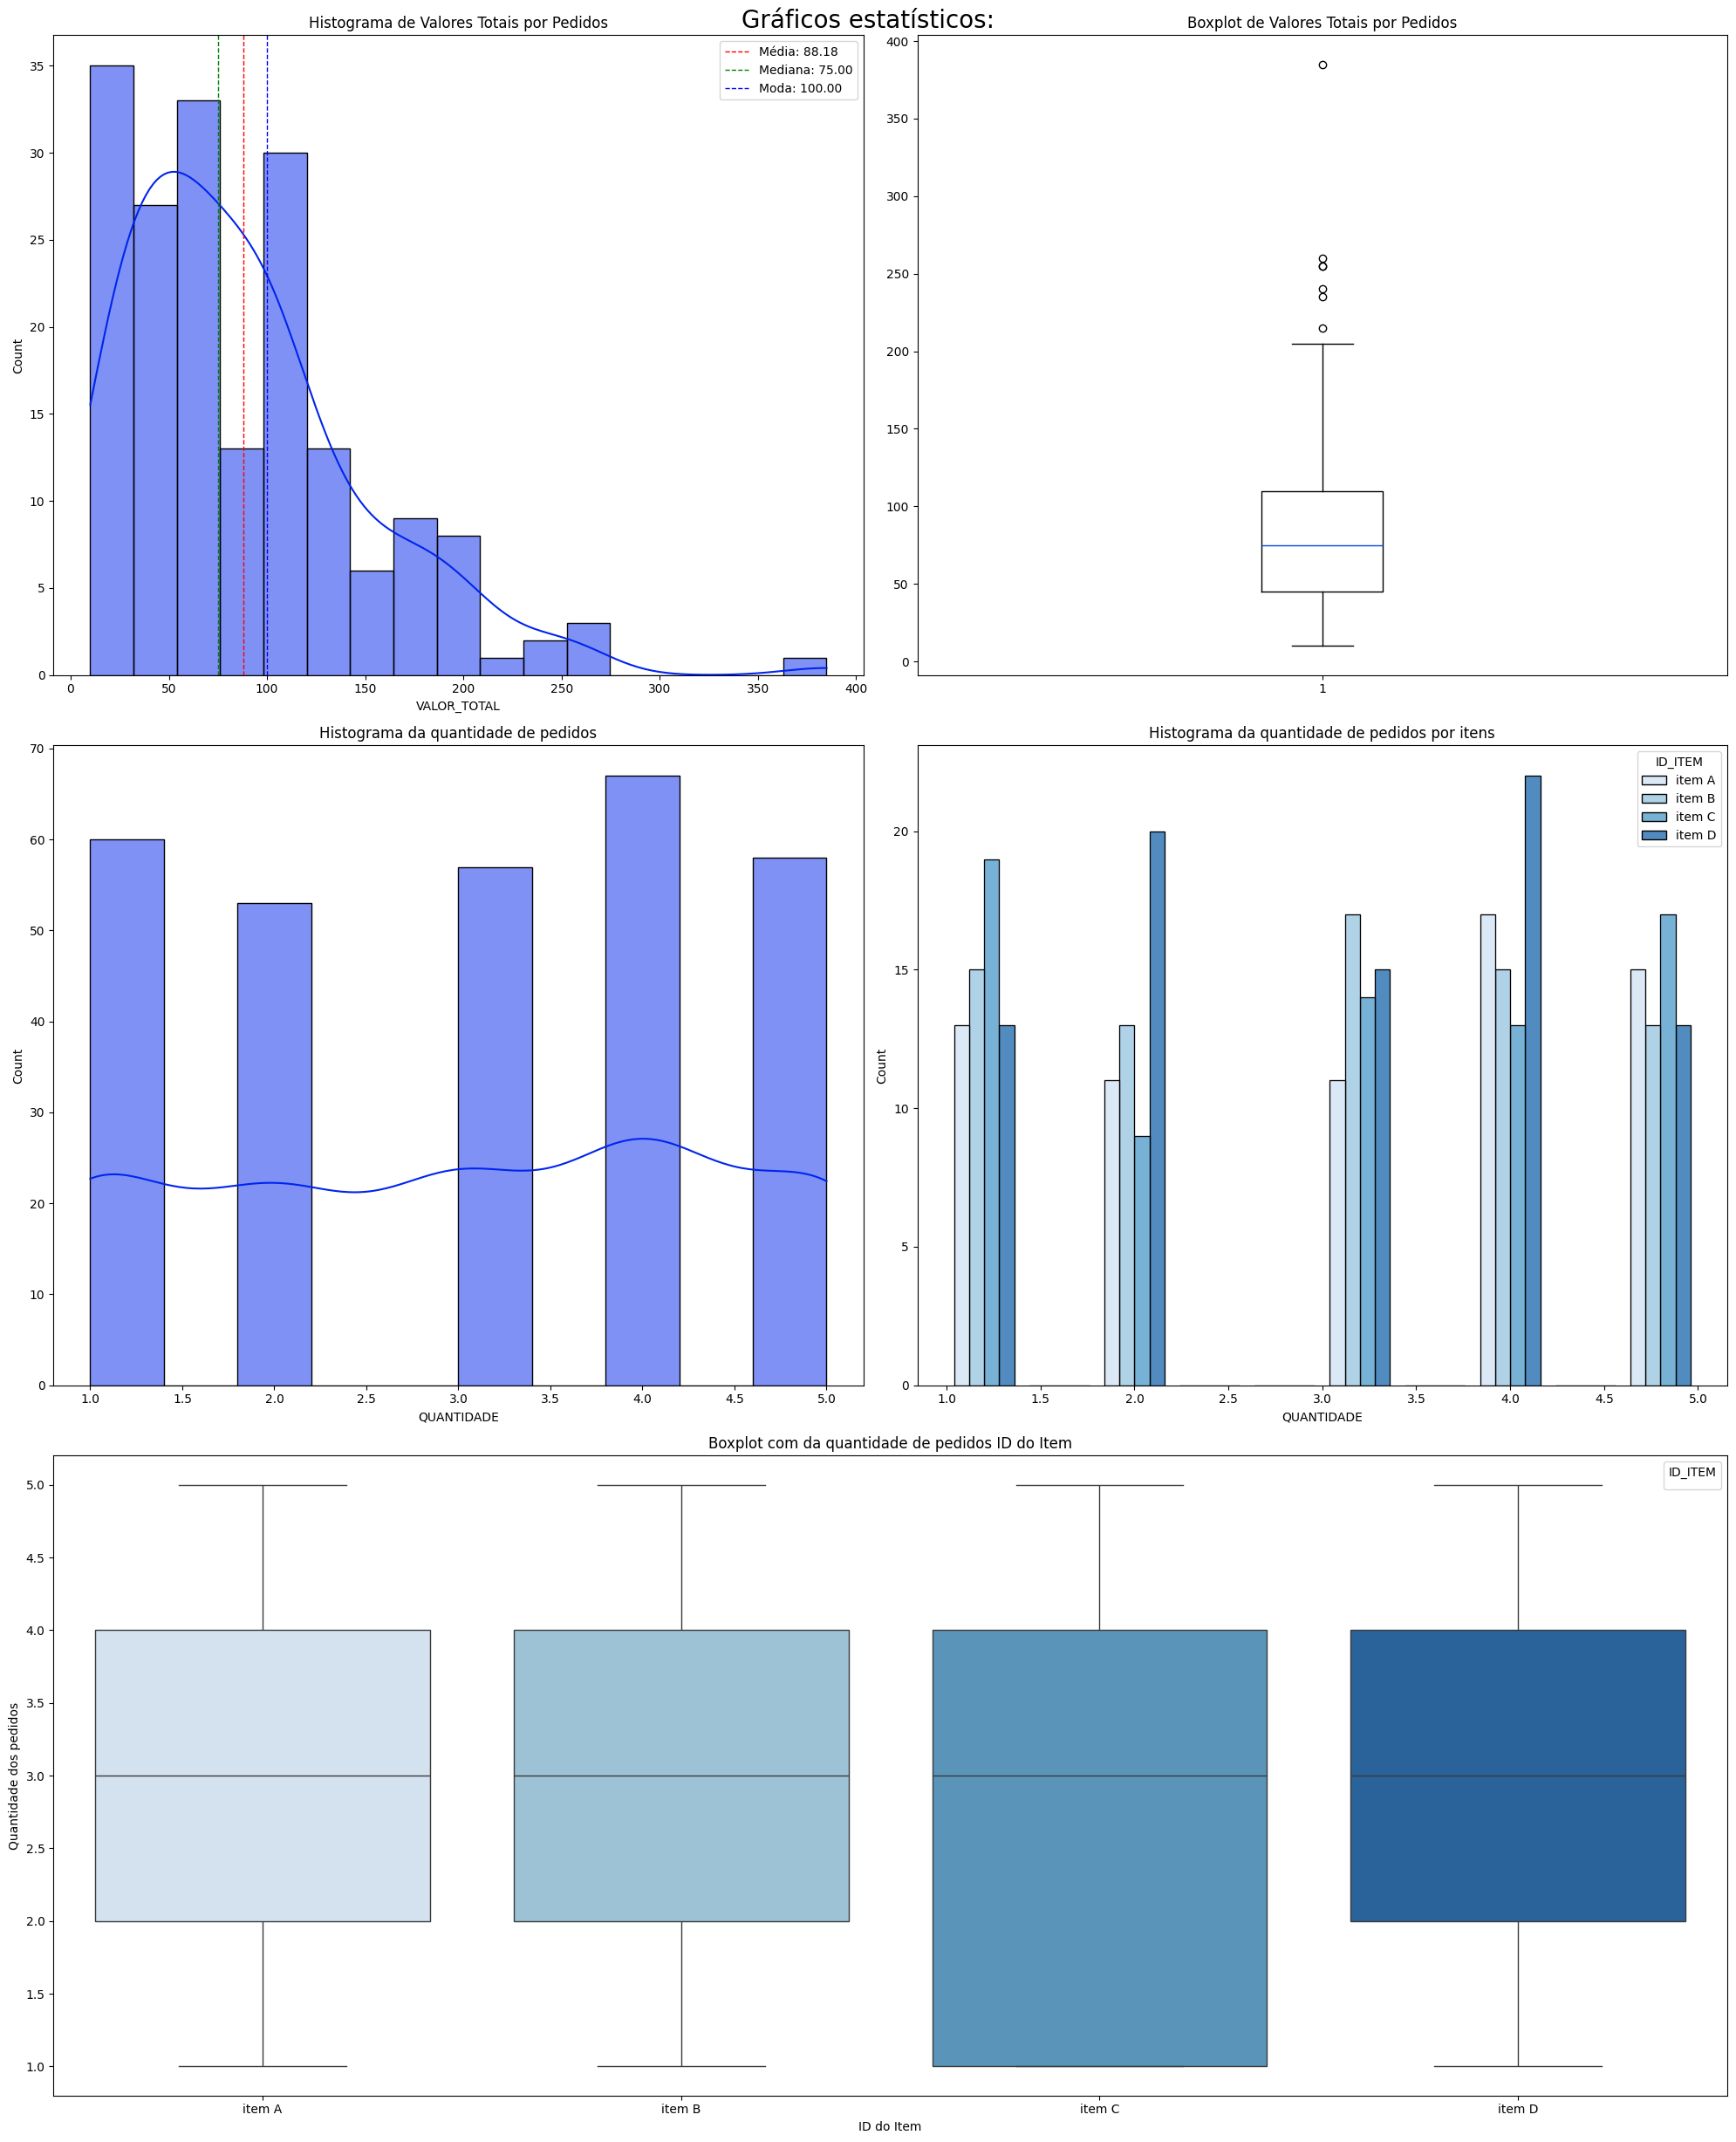

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette(sns.color_palette("winter"))

# Ordenando os dados pelo ID_ITEM
df = df.sort_values(by="ID_ITEM")

# Criando a figura principal com tamanho definido
plt.figure(figsize=(20, 25))

# Primeiro subplot: Histograma de Valores Totais por Pedidos
plt.subplot(3, 2, 1)
df_pedido = df.groupby('ID_PEDIDO')['VALOR_TOTAL'].sum().reset_index()
sns.histplot(data=df_pedido, x="VALOR_TOTAL", kde=True)
plt.title('Histograma de Valores Totais por Pedidos')
media = df_pedido['VALOR_TOTAL'].mean()
mediana = df_pedido['VALOR_TOTAL'].median()
moda = df_pedido['VALOR_TOTAL'].mode().iloc[0]
plt.axvline(media, color='r', linestyle='dashed', linewidth=1, label=f'Média: {media:.2f}')
plt.axvline(mediana, color='g', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='b', linestyle='dashed', linewidth=1, label=f'Moda: {moda:.2f}')
plt.legend()

# Segundo subplot: Boxplot de Valores Totais por Pedidos
plt.subplot(3, 2, 2)
plt.boxplot(data=df_pedido, x="VALOR_TOTAL")
plt.title('Boxplot de Valores Totais por Pedidos')

# Terceiro subplot: Histograma da quantidade de pedidos
plt.subplot(3, 2, 3)
sns.histplot(data=df, x="QUANTIDADE", kde=True)
plt.title('Histograma da quantidade de pedidos')

# Quarto subplot: Histograma da quantidade de pedidos por itens
plt.subplot(3, 2, 4)
sns.histplot(data=df, x="QUANTIDADE", hue="ID_ITEM", multiple="dodge", shrink=.8, palette='Blues')
plt.title('Histograma da quantidade de pedidos por itens')

# Quinto subplot: Boxplot com KDE por ID do Item
plt.subplot(3, 1, 3)
sns.boxplot(data=df, x='ID_ITEM', y='QUANTIDADE', hue='ID_ITEM', palette='Blues', legend=False)
sns.kdeplot(data=df[df['ID_ITEM'] == 'A']['QUANTIDADE'], color='blue', label='A', linewidth=2)
sns.kdeplot(data=df[df['ID_ITEM'] == 'B']['QUANTIDADE'], color='lightblue', label='B', linewidth=2)
sns.kdeplot(data=df[df['ID_ITEM'] == 'C']['QUANTIDADE'], color='skyblue', label='C', linewidth=2)
plt.xlabel('ID do Item')
plt.ylabel('Quantidade dos pedidos')
plt.title('Boxplot com da quantidade de pedidos ID do Item')
plt.legend(title='ID_ITEM')

# Mostrando a figura completa
plt.suptitle("Gráficos estatísticos:", fontsize=20)
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()


In [89]:
df_pedido

,ID_PEDIDO,VALOR_TOTAL
0,120210601,80
1,220210601,30
2,320210604,20
3,420210604,100
4,520210604,30
...,...,...
176,14420210830,40
177,14520210830,75
178,14520210831,205
179,14620210901,50


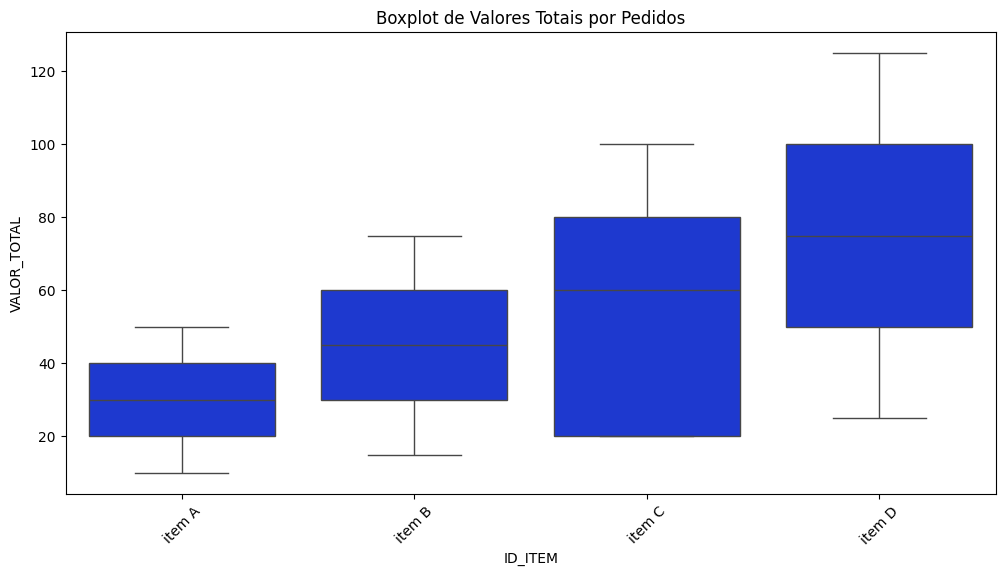

In [90]:
palette = sns.set_palette(sns.color_palette("winter"))
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="ID_ITEM", y="VALOR_TOTAL", palette= palette)
plt.title('Boxplot de Valores Totais por Pedidos')
plt.xlabel('ID_ITEM')
plt.ylabel('VALOR_TOTAL')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

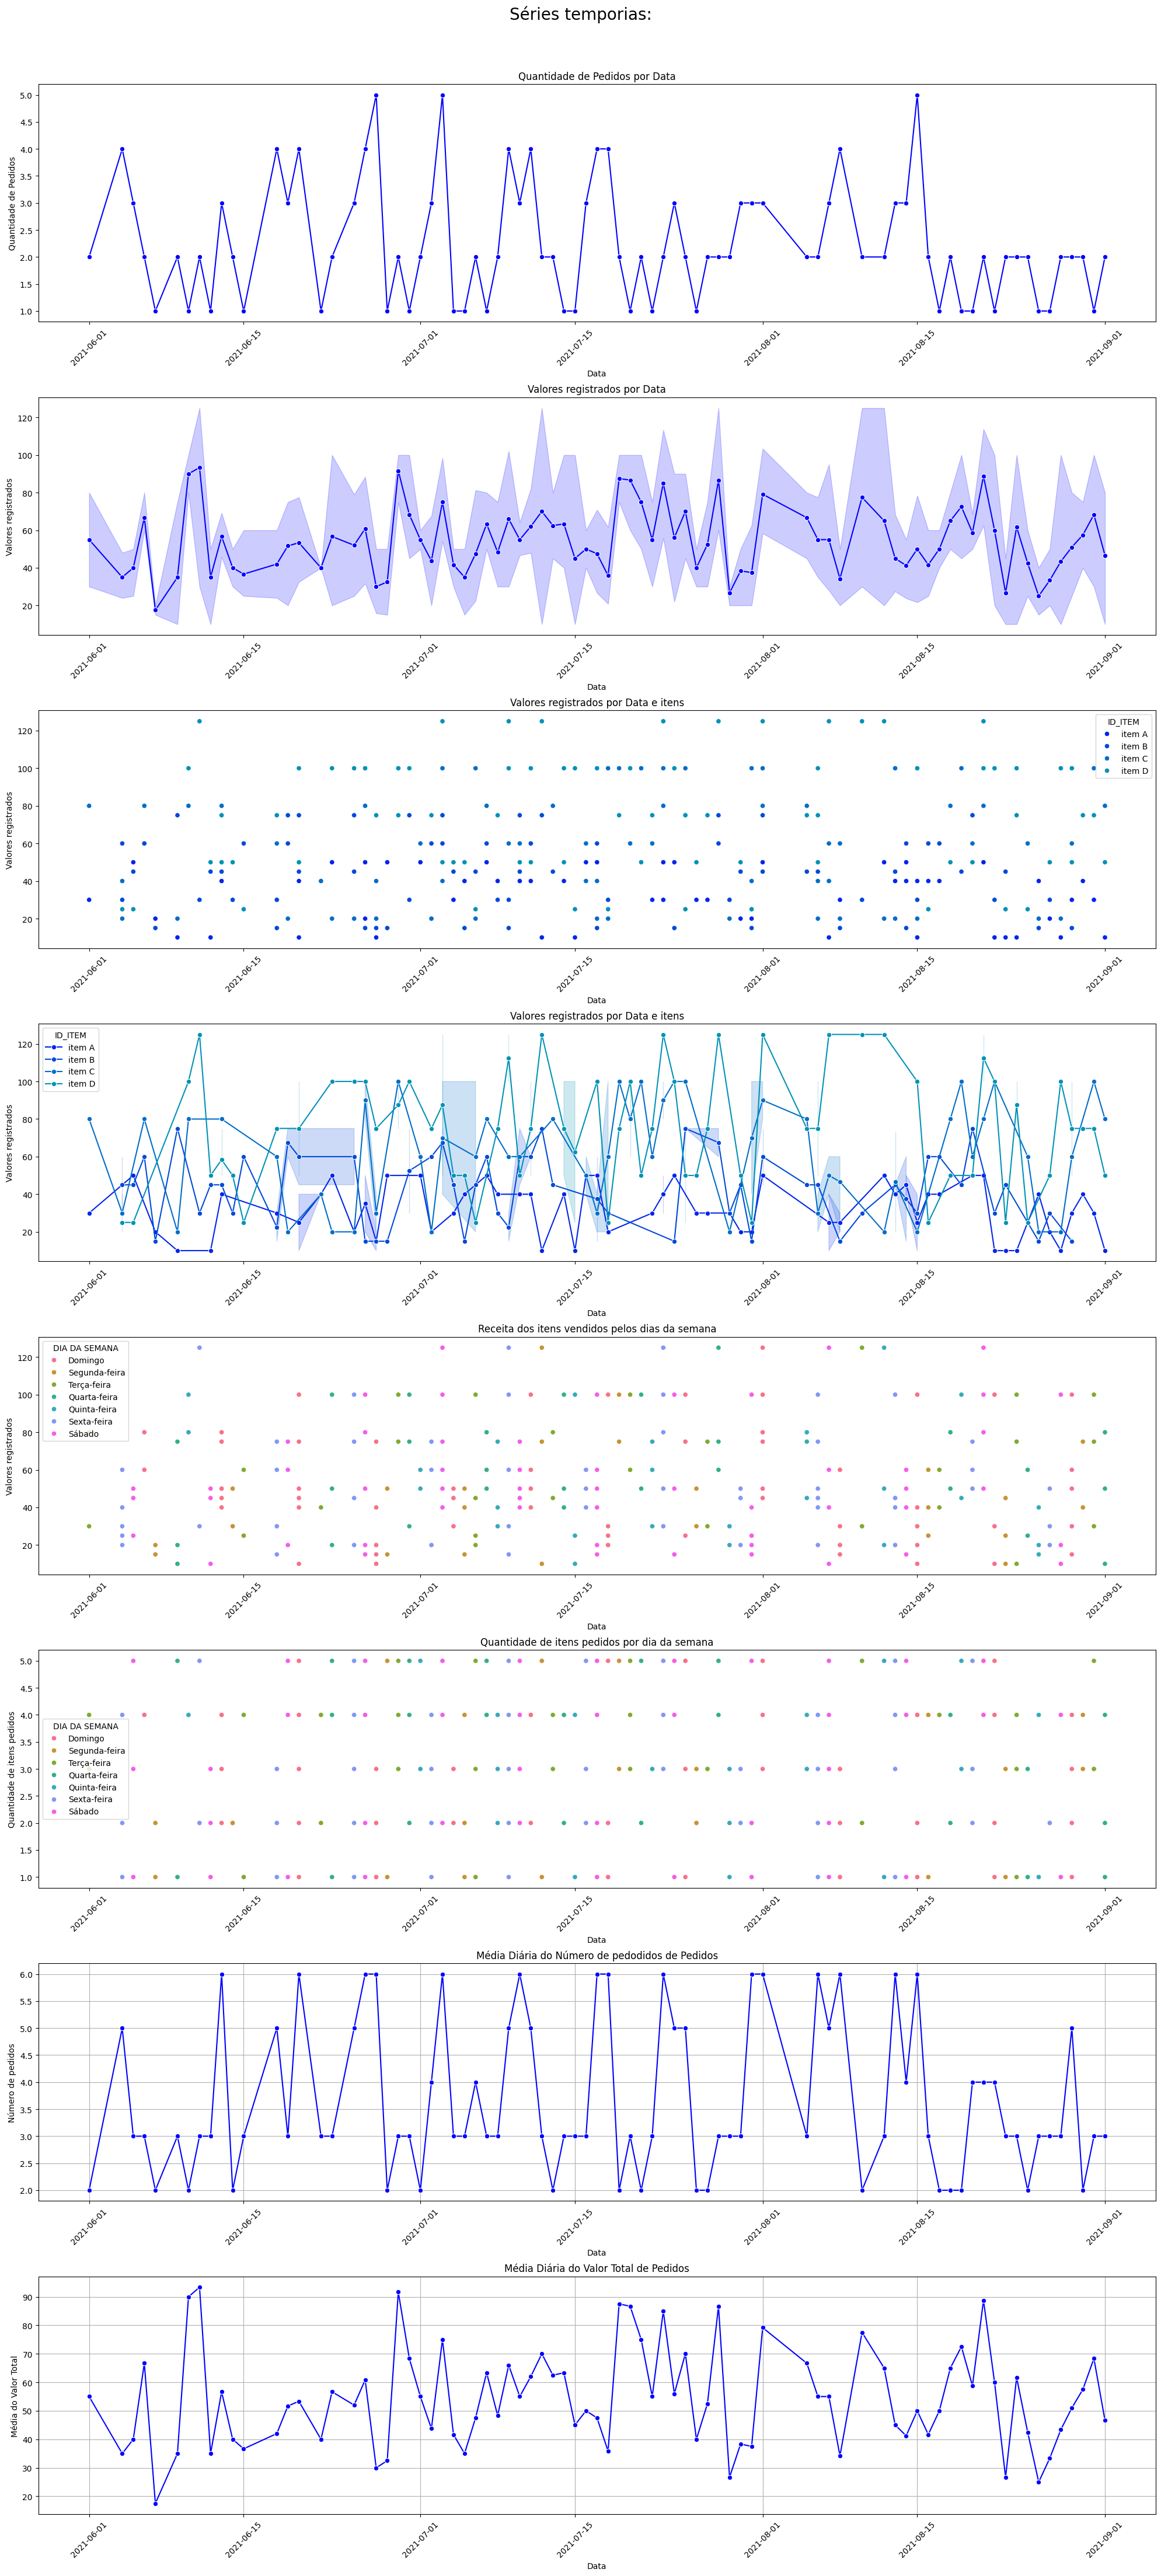

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupando dados
df_pedido = df.groupby(['ID_PEDIDO', 'DATA'])['VALOR_TOTAL'].sum().reset_index().sort_values(by='DATA')
pedidos_por_data = df_pedido.groupby('DATA').size().reset_index(name='Quantidade de Pedidos')

plt.figure(figsize=(20, 45))

# Subplot 1
plt.subplot(8,1,1)
sns.lineplot(x='DATA', y='Quantidade de Pedidos', data=pedidos_por_data, marker='o', color='b')
plt.title('Quantidade de Pedidos por Data')
plt.xlabel('Data')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 2
plt.subplot(8,1,2)
sns.lineplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b')
plt.title('Valores registrados por Data')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 3
plt.subplot(8,1,3)
sns.scatterplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b', hue='ID_ITEM')
plt.title('Valores registrados por Data e itens')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 4
plt.subplot(8,1,4)
sns.lineplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b', hue='ID_ITEM')
plt.title('Valores registrados por Data e itens')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 5
plt.subplot(8,1,5)
sns.scatterplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b', hue='DIA DA SEMANA')
plt.title('Receita dos itens vendidos pelos dias da semana')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 6
plt.subplot(8,1,6)
sns.scatterplot(x='DATA', y='QUANTIDADE', data=df, marker='o', color='b', hue='DIA DA SEMANA')
plt.title('Quantidade de itens pedidos por dia da semana')
plt.xlabel('Data')
plt.ylabel('Quantidade de itens pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle("Séries temporias:", fontsize=20)


pedidos_por_data = df.groupby('DATA').agg({'VALOR_TOTAL': 'mean', 'ID_PEDIDO': 'count'}).reset_index()
pedidos_por_data.columns = ['DATA', 'MEDIA_VALOR_TOTAL', 'NUM_PEDIDOS']
pedidos_por_data = pedidos_por_data.sort_values(by='DATA').reset_index(drop=True)
plt.subplot(8,1,8)
sns.lineplot(x='DATA', y='MEDIA_VALOR_TOTAL', data=pedidos_por_data, marker='o', color='b')
plt.title('Média Diária do Valor Total de Pedidos')
plt.xlabel('Data')
plt.ylabel('Média do Valor Total')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.subplot(8,1,7)
sns.lineplot(x='DATA', y='NUM_PEDIDOS', data=pedidos_por_data, marker='o', color='b')
plt.title('Média Diária do Número de pedodidos de Pedidos')
plt.xlabel('Data')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.subplots_adjust(top=0.95)
plt.show()


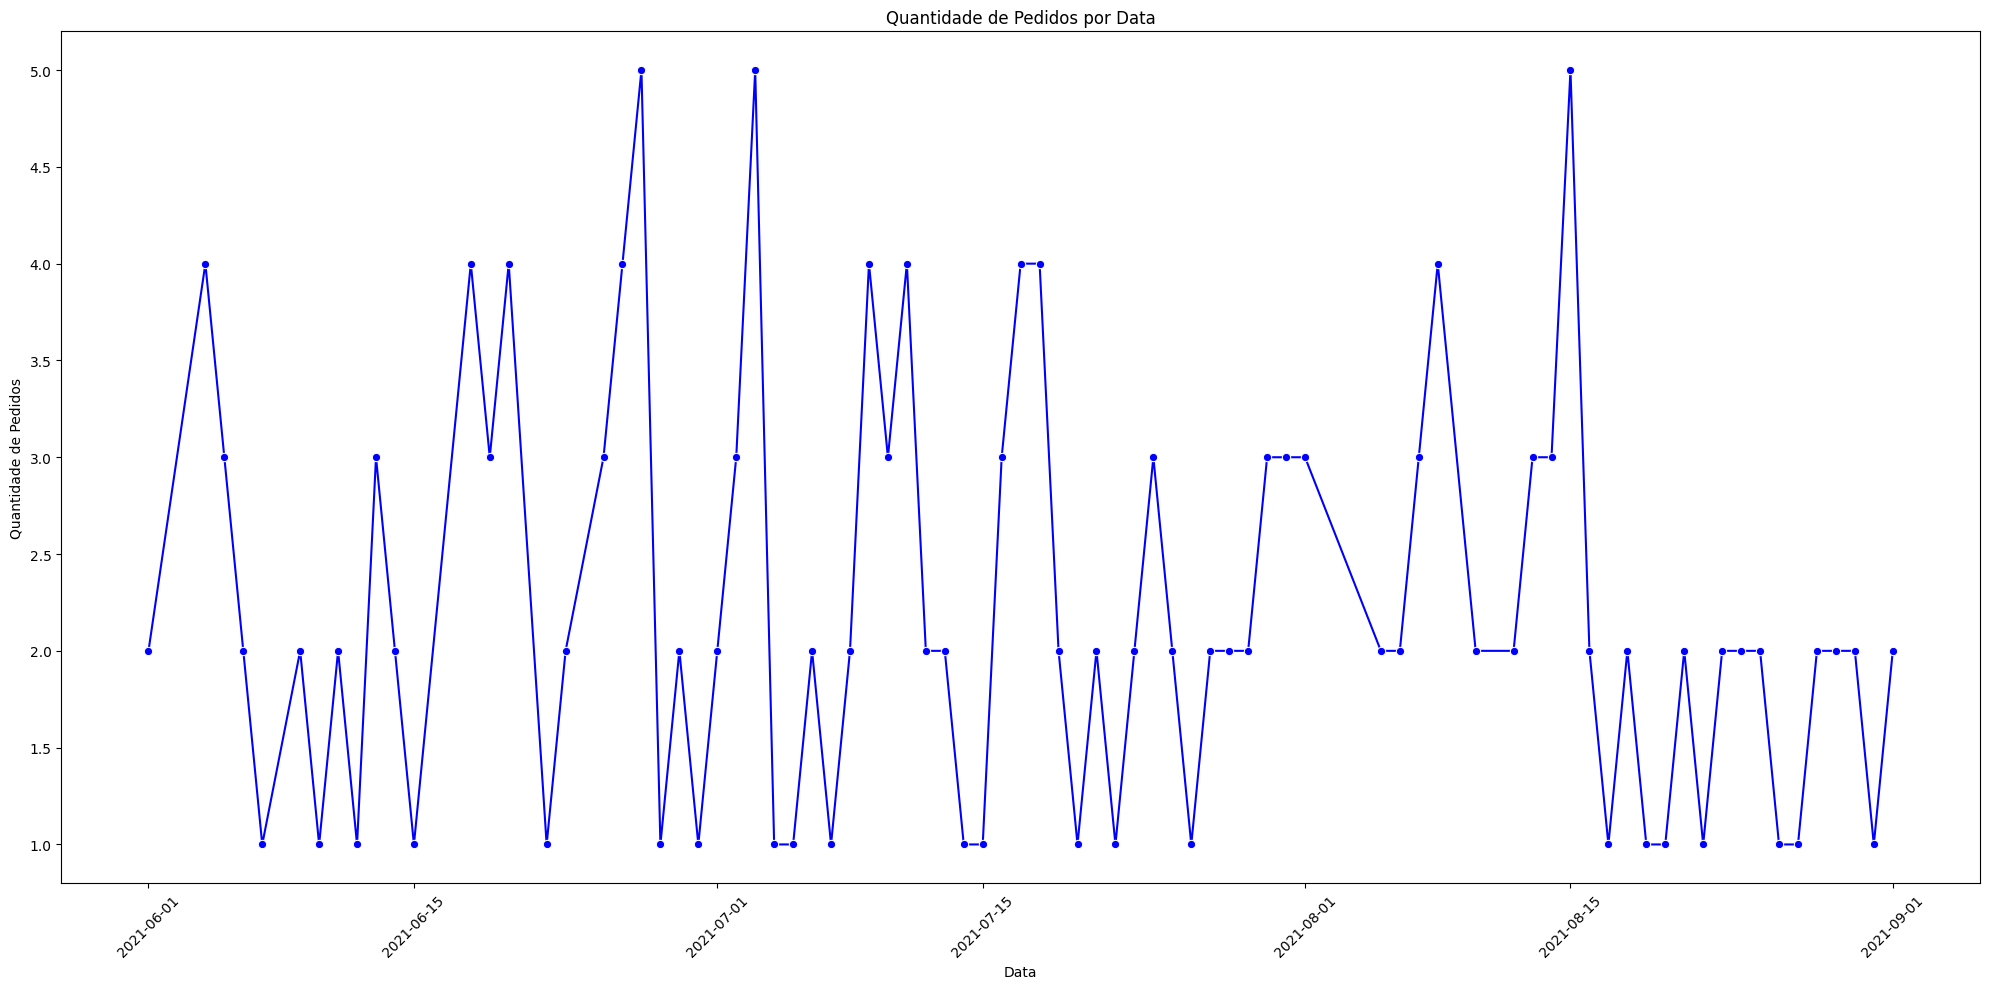

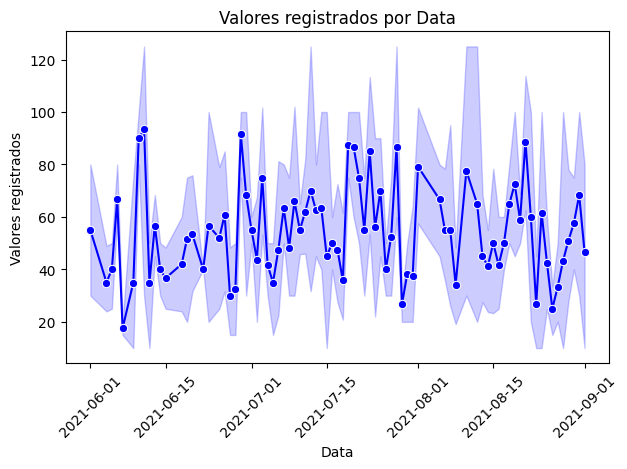

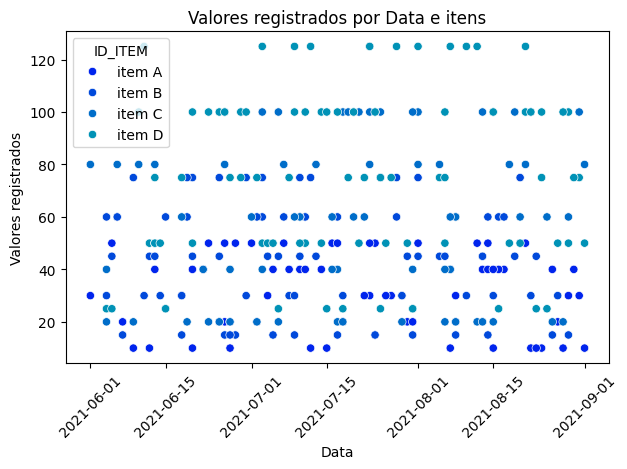

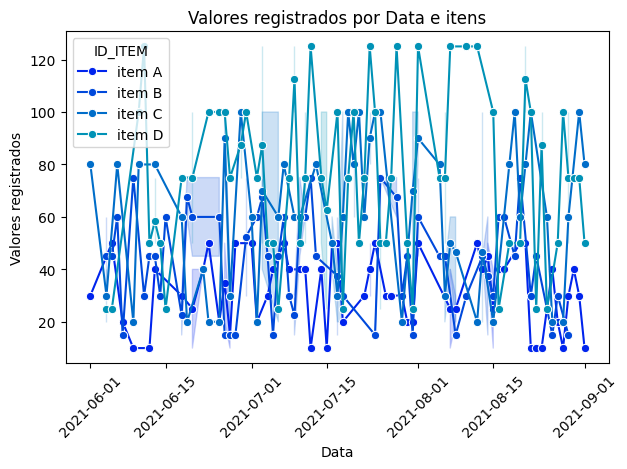

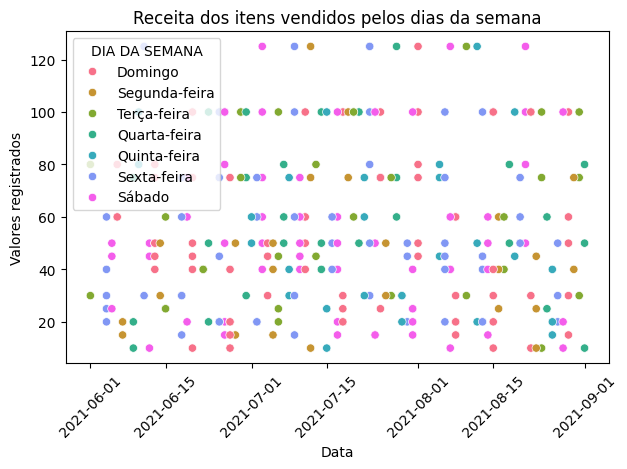

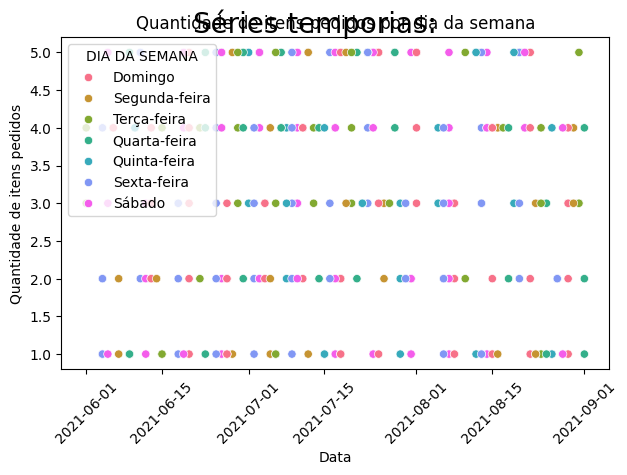

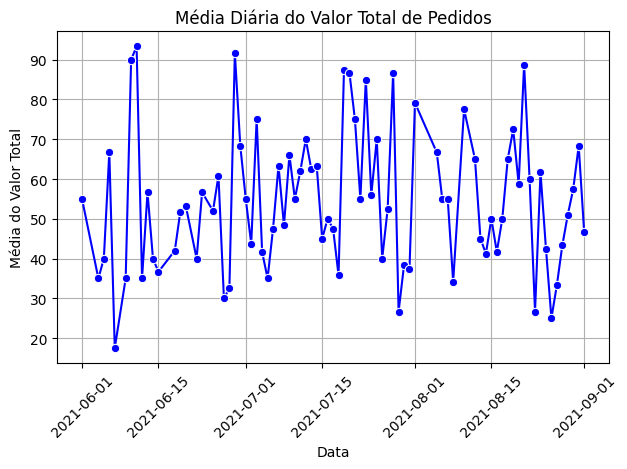

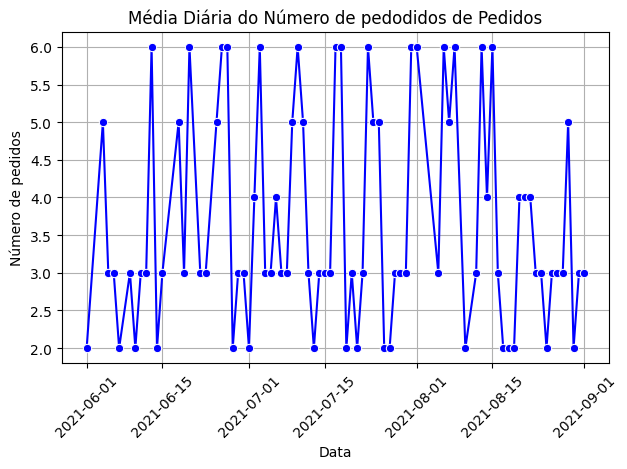

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupando dados
df_pedido = df.groupby(['ID_PEDIDO', 'DATA'])['VALOR_TOTAL'].sum().reset_index().sort_values(by='DATA')
pedidos_por_data = df_pedido.groupby('DATA').size().reset_index(name='Quantidade de Pedidos')

plt.figure(figsize=(20, 10))

# Subplot 1
sns.lineplot(x='DATA', y='Quantidade de Pedidos', data=pedidos_por_data, marker='o', color='b')
plt.title('Quantidade de Pedidos por Data')
plt.xlabel('Data')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 2
plt.show()
sns.lineplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b')
plt.title('Valores registrados por Data')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 3
plt.show()
sns.scatterplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b', hue='ID_ITEM')
plt.title('Valores registrados por Data e itens')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 4
plt.show()
sns.lineplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b', hue='ID_ITEM')
plt.title('Valores registrados por Data e itens')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 5
plt.show()
sns.scatterplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b', hue='DIA DA SEMANA')
plt.title('Receita dos itens vendidos pelos dias da semana')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 6
plt.show()
sns.scatterplot(x='DATA', y='QUANTIDADE', data=df, marker='o', color='b', hue='DIA DA SEMANA')
plt.title('Quantidade de itens pedidos por dia da semana')
plt.xlabel('Data')
plt.ylabel('Quantidade de itens pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle("Séries temporias:", fontsize=20)


pedidos_por_data = df.groupby('DATA').agg({'VALOR_TOTAL': 'mean', 'ID_PEDIDO': 'count'}).reset_index()
pedidos_por_data.columns = ['DATA', 'MEDIA_VALOR_TOTAL', 'NUM_PEDIDOS']
pedidos_por_data = pedidos_por_data.sort_values(by='DATA').reset_index(drop=True)
plt.show()
sns.lineplot(x='DATA', y='MEDIA_VALOR_TOTAL', data=pedidos_por_data, marker='o', color='b')
plt.title('Média Diária do Valor Total de Pedidos')
plt.xlabel('Data')
plt.ylabel('Média do Valor Total')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()
sns.lineplot(x='DATA', y='NUM_PEDIDOS', data=pedidos_por_data, marker='o', color='b')
plt.title('Média Diária do Número de pedodidos de Pedidos')
plt.xlabel('Data')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()


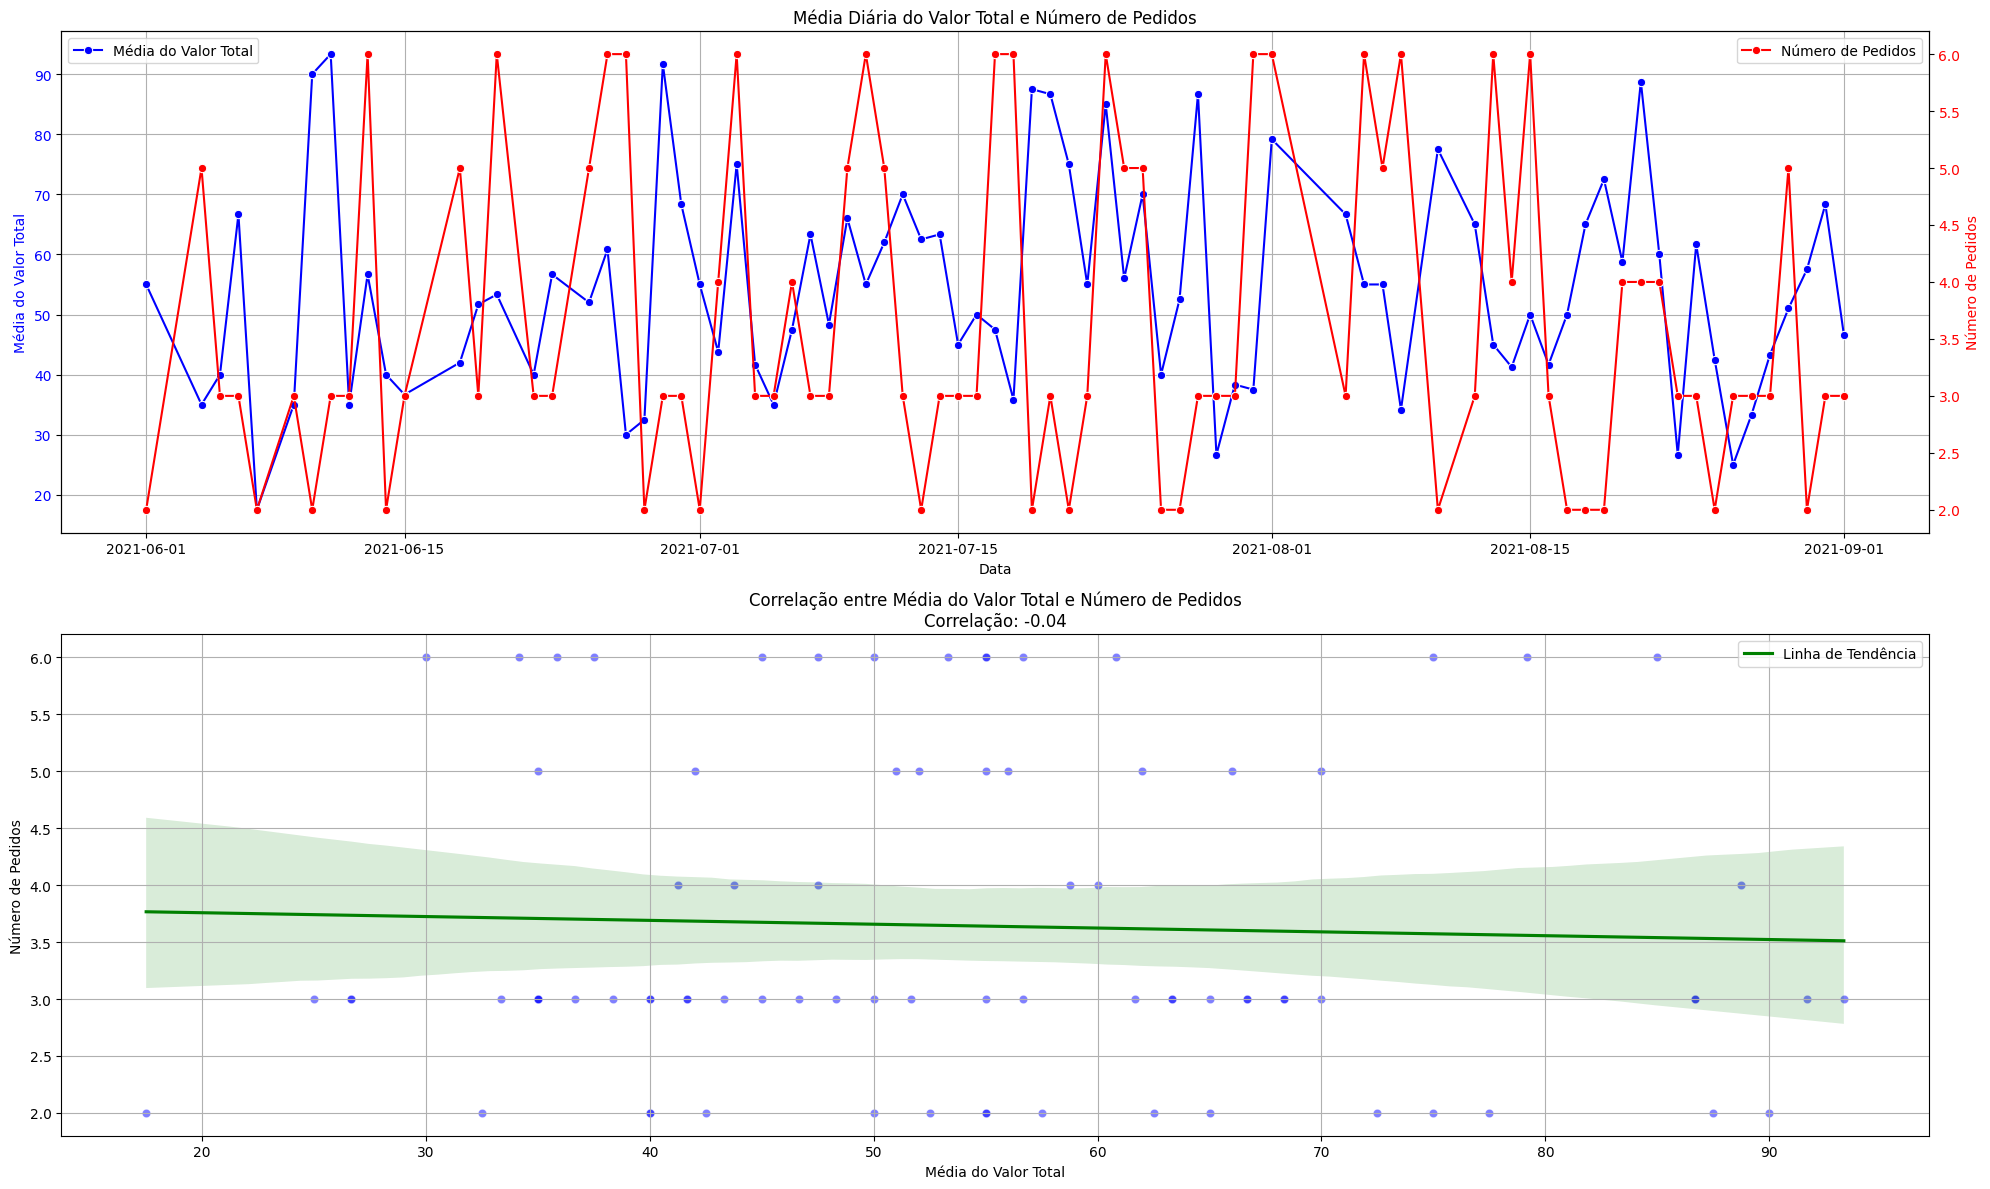

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seus dados e preparação
pedidos_por_data = df.groupby('DATA').agg({'VALOR_TOTAL': 'mean', 'ID_PEDIDO': 'count'}).reset_index()
pedidos_por_data.columns = ['DATA', 'MEDIA_VALOR_TOTAL', 'NUM_PEDIDOS']
pedidos_por_data = pedidos_por_data.sort_values(by='DATA').reset_index(drop=True)

# Criando o gráfico
plt.figure(figsize=(20, 12))

# Plotando a média diária do valor total de pedidos
plt.subplot(2,1,1)
ax1 = sns.lineplot(x='DATA', y='MEDIA_VALOR_TOTAL', data=pedidos_por_data, marker='o', color='b', label='Média do Valor Total')
ax1.set_xlabel('Data')
ax1.set_ylabel('Média do Valor Total', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax2 = ax1.twinx()
sns.lineplot(x='DATA', y='NUM_PEDIDOS', data=pedidos_por_data, marker='o', color='r', ax=ax2, label='Número de Pedidos')
ax2.set_ylabel('Número de Pedidos', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Média Diária do Valor Total e Número de Pedidos')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

correlation = pedidos_por_data['MEDIA_VALOR_TOTAL'].corr(pedidos_por_data['NUM_PEDIDOS'])
rounded_correlation = round(correlation, 2)  # Arredonda para duas casas decimais
correlation_text = f'Correlação: {rounded_correlation}'

# Plotar o gráfico de dispersão com linha de tendência
plt.subplot(2,1,2)
sns.scatterplot(x='MEDIA_VALOR_TOTAL', y='NUM_PEDIDOS', data=pedidos_por_data, color='b', alpha=0.5)
sns.regplot(x='MEDIA_VALOR_TOTAL', y='NUM_PEDIDOS', data=pedidos_por_data, scatter=False, color='g', label='Linha de Tendência')
plt.title('Correlação entre Média do Valor Total e Número de Pedidos\n' + correlation_text)
plt.xlabel('Média do Valor Total')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.show()


In [94]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

df_media_diaria = df.groupby('DATA').agg(
    MEDIA_PEDIDOS=('ID_PEDIDO', 'count'),
    MEDIA_VALOR_TOTAL=('VALOR_TOTAL', 'mean')
).reset_index()
display(df_media_diaria)

# Carregando o df_media_diaria (presumindo que já esteja carregado com as colunas DATA, MEDIA_PEDIDOS e MEDIA_VALOR_TOTAL)

# Verificando o tamanho da série temporal
print(f"Número de observações em MEDIA_PEDIDOS: {len(df_media_diaria['MEDIA_PEDIDOS'])}")

# Decomposição Sazonal de MEDIA_PEDIDOS (Semanal)
print("---------------------------------------------------------------------------")
print("Decomposição Sazonal - MEDIA_PEDIDOS (Semanal)")
print("---------------------------------------------------------------------------")

# Definindo a periodicidade semanal
periodo_semanal = 7

try:
  decomposicao_pedidos = seasonal_decompose(df_media_diaria["MEDIA_PEDIDOS"], model="additive", period=periodo_semanal)
  trend_pedidos = decomposicao_pedidos.trend
  seasonal_pedidos = decomposicao_pedidos.seasonal
  residuo_pedidos = decomposicao_pedidos.resid

  print("Tendência de Pedidos:")
  print(trend_pedidos.head())

  print("\nSazonalidade de Pedidos:")
  print(seasonal_pedidos.head())

  print("\nResíduo de Pedidos:")
  print(residuo_pedidos.head())

except ValueError as e:
  print(f"Erro na decomposição sazonal semanal: {e}")
  print("---------------------------------------------------------------------------")
  print("Possíveis soluções:")
  print("1. Verificar a existência de dados em todos os dias da semana.")
  print("2. Tratar valores ausentes ou inconsistentes.")
  print("3. Aumentar o tamanho do dataset para decomposição semanal.")

# Decomposição Sazonal de MEDIA_VALOR_TOTAL (Semanal)
print("---------------------------------------------------------------------------")
print("Decomposição Sazonal - MEDIA_VALOR_TOTAL (Semanal)")
print("---------------------------------------------------------------------------")

try:
  decomposicao_valor = seasonal_decompose(df_media_diaria["MEDIA_VALOR_TOTAL"], model="additive", period=periodo_semanal)
  trend_valor = decomposicao_valor.trend
  seasonal_valor = decomposicao_valor.seasonal
  residuo_valor = decomposicao_valor.resid

  print("Tendência de Valor Total:")
  print(trend_valor.head())

  print("\nSazonalidade de Valor Total:")
  print(seasonal_valor.head())

  print("\nResíduo de Valor Total:")
  print(residuo_valor.head())

except ValueError as e:
  print(f"Erro na decomposição sazonal semanal: {e}")
  print("---------------------------------------------------------------------------")
  print("Possíveis soluções:")
  print("1. Verificar a existência de dados em todos os dias da semana.")
  print("2. Tratar valores ausentes ou inconsistentes.")
  print("3. Aumentar o tamanho do dataset para decomposição semanal.")


,DATA,MEDIA_PEDIDOS,MEDIA_VALOR_TOTAL
0,2021-06-01,2,55.000000
1,2021-06-04,5,35.000000
2,2021-06-05,3,40.000000
3,2021-06-06,3,66.666667
4,2021-06-07,2,17.500000
...,...,...,...
76,2021-08-28,3,43.333333
77,2021-08-29,5,51.000000
78,2021-08-30,2,57.500000
79,2021-08-31,3,68.333333


Número de observações em MEDIA_PEDIDOS: 81
---------------------------------------------------------------------------
Decomposição Sazonal - MEDIA_PEDIDOS (Semanal)
---------------------------------------------------------------------------
Tendência de Pedidos:
0         NaN
1         NaN
2         NaN
3    2.857143
4    3.000000
Name: trend, dtype: float64

Sazonalidade de Pedidos:
0    0.342672
1   -0.623562
2   -0.323562
3   -0.293692
4    0.667347
Name: seasonal, dtype: float64

Resíduo de Pedidos:
0         NaN
1         NaN
2         NaN
3    0.436549
4   -1.667347
Name: resid, dtype: float64
---------------------------------------------------------------------------
Decomposição Sazonal - MEDIA_VALOR_TOTAL (Semanal)
---------------------------------------------------------------------------
Tendência de Valor Total:
0          NaN
1          NaN
2          NaN
3    48.452381
4    53.928571
Name: trend, dtype: float64

Sazonalidade de Valor Total:
0    9.497557
1    0.115955
2 

In [97]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    if result[1] <= 0.05:
        print("=> Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("=> Weak evidence against the null hypothesis, fail to reject the null hypothesis. Data has a unit root and is non-stationary")

# Função para executar o teste KPSS
def kpss_test(series, title=''):
    print(f'KPSS Test: {title}')
    result = kpss(series.dropna(), regression='c')
    labels = ['KPSS Test Statistic', 'p-value', '# Lags Used']
    out = pd.Series(result[0:3], index=labels)
    for key, value in result[3].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    if result[1] <= 0.05:
        print("=> Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("=> Weak evidence against the null hypothesis, fail to reject the null hypothesis. Data has a unit root and is non-stationary")

# Executar os testes
print("MEDIA_PEDIDOS")
adf_test(df_media_diaria['MEDIA_PEDIDOS'], title='MEDIA_PEDIDOS')
kpss_test(df_media_diaria['MEDIA_PEDIDOS'], title='MEDIA_PEDIDOS')
print("\nMEDIA_VALOR_TOTAL")
adf_test(df_media_diaria['MEDIA_VALOR_TOTAL'], title='MEDIA_VALOR_TOTAL')
kpss_test(df_media_diaria['MEDIA_VALOR_TOTAL'], title='MEDIA_VALOR_TOTAL')

MEDIA_PEDIDOS
Augmented Dickey-Fuller Test: MEDIA_PEDIDOS
ADF Test Statistic      -3.130779
p-value                  0.024358
# Lags Used             11.000000
# Observations Used     69.000000
Critical Value (1%)     -3.528890
Critical Value (5%)     -2.904440
Critical Value (10%)    -2.589656
stationary
KPSS Test: MEDIA_PEDIDOS
KPSS Test Statistic      0.108707
p-value                  0.100000
# Lags Used              0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
=> Weak evidence against the null hypothesis, fail to reject the null hypothesis. Data has a unit root and is non-stationary

MEDIA_VALOR_TOTAL
Augmented Dickey-Fuller Test: MEDIA_VALOR_TOTAL
ADF Test Statistic     -7.842824e+00
p-value                 5.874841e-12
# Lags Used             0.000000e+00
# Observations Used     8.000000e+01
Critical Value (1%)    -3.514869e+00
Critical Value (5%)    -2.898409e+00
Critical Value (

/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_50305/1317203138.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')
/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_50305/1317203138.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


,Combinação de Itens,Quantidade de Pedidos
0,"(item B, item D)",28
1,"(item A, item C)",27
2,"(item C, item D)",26
3,"(item B, item C)",22
4,"(item A, item D)",22


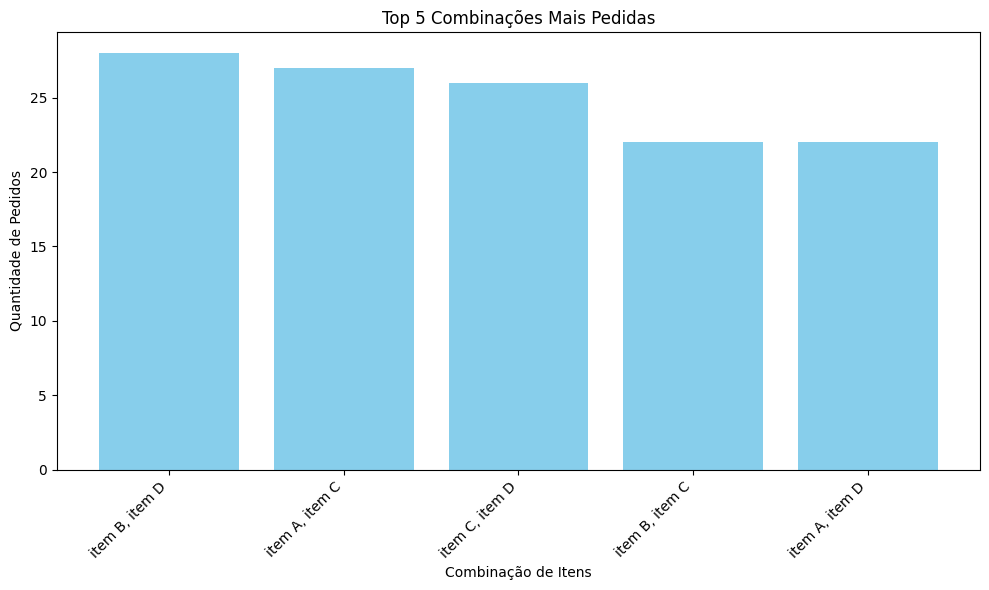

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations


def find_combinations(items):
    combos = []
    for r in range(2, len(items) + 1):
        combos.extend(combinations(sorted(items), r))
    return combos

combinacoes = df.groupby('ID_PEDIDO')['ID_ITEM'].apply(find_combinations).explode().reset_index()
combinacoes.columns = ['ID_PEDIDO', 'Combinação de Itens']

contagem_combinacoes = combinacoes['Combinação de Itens'].value_counts().reset_index()
contagem_combinacoes.columns = ['Combinação de Itens', 'Quantidade de Pedidos']

top_combinacoes = contagem_combinacoes.head(5)

display(top_combinacoes)

top_combinacoes.loc[:, 'Combinação de Itens'] = top_combinacoes['Combinação de Itens'].apply(lambda x: ', '.join(x))

plt.figure(figsize=(10, 6))
plt.bar(top_combinacoes['Combinação de Itens'], top_combinacoes['Quantidade de Pedidos'], color='skyblue')
plt.xlabel('Combinação de Itens')
plt.ylabel('Quantidade de Pedidos')
plt.title('Top 5 Combinações Mais Pedidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 2 - Desenvolvimento do Modelo Preditivo:
## ● Selecionar um modelo adequado para previsão de demanda, como regressão linear ou regressão logística, com base na análise exploratória e nas características dos dados.
## ● Dividir os dados em conjuntos de treinamento e teste.
## ● Treinar o modelo utilizando os dados históricos de vendas e realizar a validação para avaliar seu desempenho.


## 1- Excluir linhas duplicadas:
### Melhorar a precisão do modelo.
## 2- Retirar dados nulos:
### Dados nulos podem prejudicar a análise estatística e a modelagem preditiva, pois muitos algoritmos e técnicas estatísticas não conseguem lidar diretamente com valores ausentes. Isso pode levar a resultados distorcidos, viés nos modelos ou até mesmo falha na execução de certas operações.
## 3- Retirar outliers:
### Melhorar a precisão do modelo.
## 4- Manter features com alta correlação (feature Década):
### Manter features com alta correlação pode ser benéfico em alguns casos, especialmente em modelos lineares ou quando a multicolinearidade não é um problema significativo.
## 5- One-hot encoding:
### Transformar variáveis categóricas em uma representação numérica que pode ser usada em modelos de machine learning, como a feature Bairro.
## 6- Normalização:
### A normalização é uma técnica de pré-processamento de dados utilizada para ajustar os valores de variáveis numéricas para uma escala comum entre 0 e 1, sem distorcer as diferenças nos intervalos de valores.
## 7- Modelos utilizados:
### Regressão Linear: Simples, rápida, fácil de interpretar, mas assume relação linear.
### Árvore de Decisão: Capaz de capturar relações não lineares, interpretável, mas pode sofrer de overfitting.
### Floresta Aleatória: Melhor precisão e robustez, boa para relações complexas, mas menos interpretável e mais computacionalmente intensiva.
## 8- Validação Cruzada:
### Evitar o sobreajuste, que ocorre quando o modelo se torna muito específico para os dados de treinamento e não consegue generalizar para outras situações.
## 9- GridSearchCV (Cross Validation):
### Otimização de hiperparâmetros, permitindo a busca exaustiva por meio de uma grade de parâmetros especificada para encontrar a melhor combinação de hiperparâmetros para um modelo. Destaca-se por ser uma técnica simples, abrangente, reprodutível, informativa e eficiente para otimizar hiperparâmetros em Machine Learning.

In [76]:
df.head(3)
df["DIA DO MES"] = df['DATA'].dt.isocalendar().day
df

,ID_PEDIDO,ID_ITEM,QUANTIDADE,PRECO,DATA,VALOR_TOTAL,DIA DA SEMANA,NUMERO DA SEMANA,NUMERO DO MES,DIA DO MES
85,4720210702,item A,2,10,2021-07-02,20,Sexta-feira,0.307692,0.333333,5
119,6220210710,item A,4,10,2021-07-10,40,Sábado,0.384615,0.333333,6
213,10820210807,item A,1,10,2021-08-07,10,Sábado,0.692308,0.666667,6
62,3320210626,item A,2,10,2021-06-26,20,Sábado,0.230769,0.000000,6
125,6620210711,item A,4,10,2021-07-11,40,Domingo,0.384615,0.333333,7
...,...,...,...,...,...,...,...,...,...,...
117,6020210710,item D,2,25,2021-07-10,50,Sábado,0.384615,0.333333,6
121,6320210711,item D,4,25,2021-07-11,100,Domingo,0.384615,0.333333,7
211,10620210806,item D,3,25,2021-08-06,75,Sexta-feira,0.692308,0.666667,5
225,11520210812,item D,5,25,2021-08-12,125,Quinta-feira,0.769231,0.666667,4


In [118]:
df

,ID_PEDIDO,ID_ITEM,QUANTIDADE,PRECO,DATA,VALOR_TOTAL,DIA DA SEMANA,NUMERO DA SEMANA,NUMERO DO MES
85,4720210702,item A,2,10,2021-07-02,20,Sexta-feira,26,7
119,6220210710,item A,4,10,2021-07-10,40,Sábado,27,7
213,10820210807,item A,1,10,2021-08-07,10,Sábado,31,8
62,3320210626,item A,2,10,2021-06-26,20,Sábado,25,6
125,6620210711,item A,4,10,2021-07-11,40,Domingo,27,7
...,...,...,...,...,...,...,...,...,...
117,6020210710,item D,2,25,2021-07-10,50,Sábado,27,7
121,6320210711,item D,4,25,2021-07-11,100,Domingo,27,7
211,10620210806,item D,3,25,2021-08-06,75,Sexta-feira,31,8
225,11520210812,item D,5,25,2021-08-12,125,Quinta-feira,32,8


In [119]:
df_grouped = df.groupby('DATA').agg({
    'QUANTIDADE': 'sum',
    'DIA DA SEMANA': 'first',
    'NUMERO DA SEMANA': 'first',
    'NUMERO DO MES': 'first'
}).reset_index()

# Ordenar pelo total de vendas diárias
df_sorted = df_grouped.sort_values(by='QUANTIDADE', ascending=False)
df_sorted['DIA DO MES'] = df_sorted['DATA'].dt.day
# Exibir o resultado
display(df_sorted)

,DATA,QUANTIDADE,DIA DA SEMANA,NUMERO DA SEMANA,NUMERO DO MES,DIA DO MES
54,2021-08-01,27,Domingo,30,8,1
45,2021-07-23,27,Sexta-feira,29,7,23
25,2021-07-03,23,Sábado,26,7,3
18,2021-06-26,21,Sábado,25,6,26
32,2021-07-10,20,Sábado,27,7,10
...,...,...,...,...,...,...
48,2021-07-26,5,Segunda-feira,30,7,26
71,2021-08-23,5,Segunda-feira,34,8,23
10,2021-06-14,4,Segunda-feira,24,6,14
73,2021-08-25,4,Quarta-feira,34,8,25


In [120]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels import robust
scaler = MinMaxScaler()
df_model = df_sorted
df_model['NUMERO DA SEMANA'] = scaler.fit_transform(df_model[['NUMERO DA SEMANA']])
df_model['NUMERO DO MES'] = scaler.fit_transform(df_model[['NUMERO DO MES']])
df_model['DIA DO MES'] = scaler.fit_transform(df_model[['DIA DO MES']])
mediana = df_model'coluna'].median()
mad = robust.mad(df_model'coluna'])
fator = 3
limite_inferior = mediana - fator * mad
limite_superior = mediana + fator * mad
df_model = df_model(df_model'coluna'] >= limite_inferior) & (df_model'coluna'] <= limite_superior)]
df_model['QUANTIDADE'] = scaler.fit_transform(df_model[['QUANTIDADE']])
df_model = df_model.drop_duplicates()
df_model= pd.get_dummies(df_model, columns=['DIA DA SEMANA'], drop_first=False, dtype=int)
df_model_quantidade = df_model.drop(columns=['DATA']) 
df_model_quantidade


,QUANTIDADE,NUMERO DA SEMANA,NUMERO DO MES,DIA DO MES,DIA DA SEMANA_Domingo,DIA DA SEMANA_Segunda-feira,DIA DA SEMANA_Terça-feira,DIA DA SEMANA_Quarta-feira,DIA DA SEMANA_Quinta-feira,DIA DA SEMANA_Sexta-feira,DIA DA SEMANA_Sábado
54,1.000000,0.615385,0.666667,0.000000,1,0,0,0,0,0,0
45,1.000000,0.538462,0.333333,0.733333,0,0,0,0,0,1,0
25,0.833333,0.307692,0.333333,0.066667,0,0,0,0,0,0,1
18,0.750000,0.230769,0.000000,0.833333,0,0,0,0,0,0,1
32,0.708333,0.384615,0.333333,0.300000,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
48,0.083333,0.615385,0.333333,0.833333,0,1,0,0,0,0,0
71,0.083333,0.923077,0.666667,0.733333,0,1,0,0,0,0,0
10,0.041667,0.153846,0.000000,0.433333,0,1,0,0,0,0,0
73,0.041667,0.923077,0.666667,0.800000,0,0,0,1,0,0,0


In [122]:
df['DATA'] = pd.to_datetime(df['DATA'])

# Agrupamento por dia e soma de quantidades
df_agrupado = df.groupby(['DATA', 'ID_ITEM'])['QUANTIDADE'].sum().reset_index()

# Ordenação por data
df_agrupado = df_agrupado.sort_values(by='DATA')
df_agrupado

,DATA,ID_ITEM,QUANTIDADE
0,2021-06-01,item A,3
1,2021-06-01,item C,4
2,2021-06-04,item B,6
3,2021-06-04,item C,3
4,2021-06-04,item D,1
...,...,...,...
222,2021-08-31,item A,3
224,2021-08-31,item D,3
226,2021-09-01,item C,4
225,2021-09-01,item A,1


In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Supondo que df_model_quantidade já contenha os dados necessários

# Definir X (atributos) e y (variável alvo)
X = df_model_quantidade.drop(columns=['QUANTIDADE'])  # atributos preditivos
y = df_model_quantidade['QUANTIDADE']  # variável alvo

# Dividir os dados em treino e teste (85% treino, 15% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Inicializar modelos
models = {
    'Regressão Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42)
}

# Loop pelos modelos
results = {}

for model_name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Prever no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular métricas de avaliação: RMSE e MAE
    rmse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    
    rmse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    results[model_name] = {
        'RMSE Treino': rmse_train,
        'MAE Treino': mae_train,
        'RMSE Teste': rmse_test,
        'MAE Teste': mae_test
    }

# Criar DataFrame com os resultados
df_results = pd.DataFrame(results).round(2)
df_modelo_results = df_results
df_modelo_results['Hiperparametro ?'] = False
df_modelo_results

/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metr

,Regressão Linear,Random Forest,Árvore de Decisão,Hiperparametro ?
RMSE Treino,0.15,0.07,0.00,False
MAE Treino,0.12,0.05,0.00,False
RMSE Teste,0.20,0.20,0.25,False
MAE Teste,0.14,0.13,0.15,False


In [124]:
df_model_quantidade.columns

Index(['QUANTIDADE', 'NUMERO DA SEMANA', 'NUMERO DO MES', 'DIA DO MES',
       'DIA DA SEMANA_Domingo', 'DIA DA SEMANA_Segunda-feira',
       'DIA DA SEMANA_Terça-feira', 'DIA DA SEMANA_Quarta-feira',
       'DIA DA SEMANA_Quinta-feira', 'DIA DA SEMANA_Sexta-feira',
       'DIA DA SEMANA_Sábado'],
      dtype='object')

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Supondo que df_model_quantidade já contenha os dados necessários

# Definir X (atributos) e y (variável alvo)
X = df_model_quantidade.drop(columns=['QUANTIDADE'])  # atributos preditivos
y = df_model_quantidade['QUANTIDADE']  # variável alvo

# Dividir os dados em treino e teste (85% treino, 15% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Inicializar modelos
models = {
    'Regressão Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42)
}

# Loop pelos modelos
results = {}

for model_name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Prever no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular métricas de avaliação: RMSE e MAE
    rmse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    
    rmse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    results[model_name] = {
        'RMSE Treino': rmse_train,
        'MAE Treino': mae_train,
        'RMSE Teste': rmse_test,
        'MAE Teste': mae_test
    }

# Criar DataFrame com os resultados
df_results = pd.DataFrame(results).round(2)
df_modelo_results = df_results
df_modelo_results['Hiperparametro ?'] = False
df_modelo_results

/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metr

,Regressão Linear,Random Forest,Árvore de Decisão,Hiperparametro ?
RMSE Treino,0.15,0.07,0.00,False
MAE Treino,0.12,0.05,0.00,False
RMSE Teste,0.20,0.20,0.25,False
MAE Teste,0.14,0.13,0.15,False


In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Supondo que df_model_quantidade já contenha os dados necessários

# Definir X (atributos) e y (variável alvo)
X = df_model_quantidade.drop(columns=['QUANTIDADE'])  # atributos preditivos
y = df_model_quantidade['QUANTIDADE']  # variável alvo

# Dividir os dados em treino e teste (85% treino, 15% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Inicializar modelos
models = {
    'Regressão Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42)
}

# Parâmetros para Grid Search em Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Parâmetros para Grid Search em Árvore de Decisão
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

results = {}

# Loop pelos modelos
for model_name, model in models.items():
    if model_name == 'Random Forest':
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    elif model_name == 'Árvore de Decisão':
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_dt, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    else:
        # Para Regressão Linear, não aplicamos Grid Search, então continuamos sem Grid Search
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        
        results[model_name] = {
            'RMSE Treino': rmse_train,
            'MAE Treino': mae_train,
            'RMSE Teste': rmse_test,
            'MAE Teste': mae_test
        }
        continue
    
    # Treinar o modelo com Grid Search
    grid_search.fit(X_train, y_train)
    
    # Melhor modelo encontrado pelo Grid Search
    best_model = grid_search.best_estimator_
    
    # Treinar o melhor modelo
    best_model.fit(X_train, y_train)
    
    # Prever no conjunto de treino e teste com o melhor modelo
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calcular métricas de avaliação com o melhor modelo
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    results[model_name] = {
        'RMSE Treino': rmse_train,
        'MAE Treino': mae_train,
        'RMSE Teste': rmse_test,
        'MAE Teste': mae_test
    }

# Criar DataFrame com os resultados e formatar para duas casas decimais
df_results = pd.DataFrame(results).round(2)
df_modelo_hiper_results = df_results
df_modelo_hiper_results['Hiperparametro ?'] = True
df_modelo_hiper_results


/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metr

,Regressão Linear,Random Forest,Árvore de Decisão,Hiperparametro ?
RMSE Treino,0.15,0.14,0.15,True
MAE Treino,0.12,0.10,0.11,True
RMSE Teste,0.20,0.19,0.19,True
MAE Teste,0.14,0.14,0.13,True


In [131]:
df_modelos = pd.concat([df_modelo_results, df_modelo_hiper_results], ignore_index=False)
df_modelos_RMSE = df_modelos.iloc[[2,6]]
df_modelos_MAE = df_modelos.iloc[[3,7]]
display(df_modelos_RMSE, df_modelos_MAE)

,Regressão Linear,Random Forest,Árvore de Decisão,Hiperparametro ?
RMSE Teste,0.2,0.20,0.25,False
RMSE Teste,0.2,0.19,0.19,True


,Regressão Linear,Random Forest,Árvore de Decisão,Hiperparametro ?
MAE Teste,0.14,0.13,0.15,False
MAE Teste,0.14,0.14,0.13,True


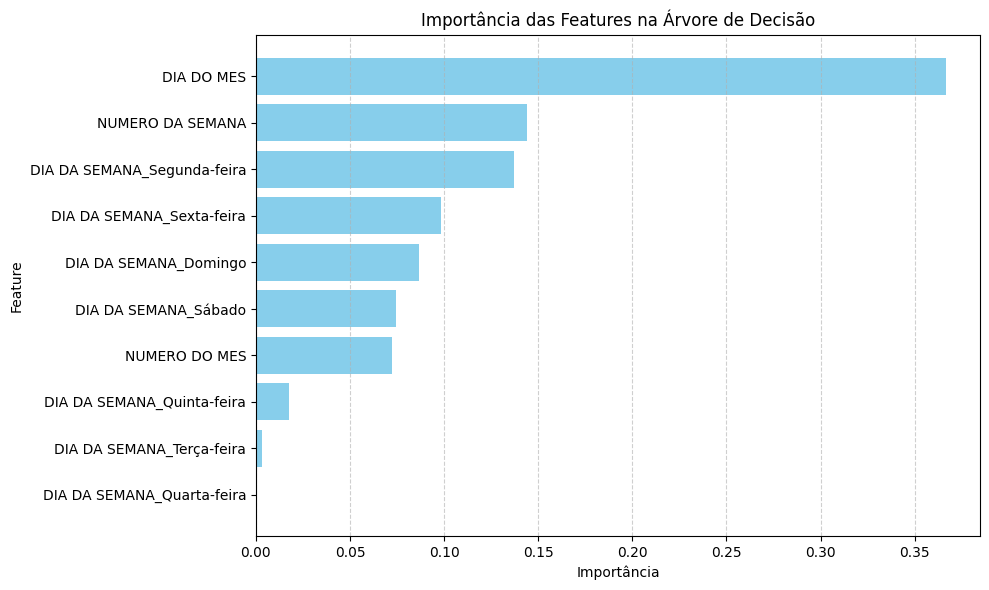

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt

# Supondo que df_model_quantidade já contenha os dados necessários

# Definir X (atributos) e y (variável alvo)
X = df_model_quantidade.drop(columns=['QUANTIDADE'])  # atributos preditivos
y = df_model_quantidade['QUANTIDADE']  # variável alvo

# Dividir os dados em treino e teste (85% treino, 15% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Inicializar modelo Árvore de Decisão
model = DecisionTreeRegressor(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Extrair importâncias das features
feature_importances = model.feature_importances_

# Criar DataFrame com nomes das features e importâncias
feature_names = X.columns
df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importância': feature_importances})
df_feature_importance = df_feature_importance.sort_values(by='Importância', ascending=False)  # Sort by importance descending

# Plotar a importância das features (opcional, usando matplotlib)
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importância'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features na Árvore de Decisão')
plt.gca().invert_yaxis()  # Invert y-axis for readability (optional)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# (Rest of your code for other models and evaluation can follow here)


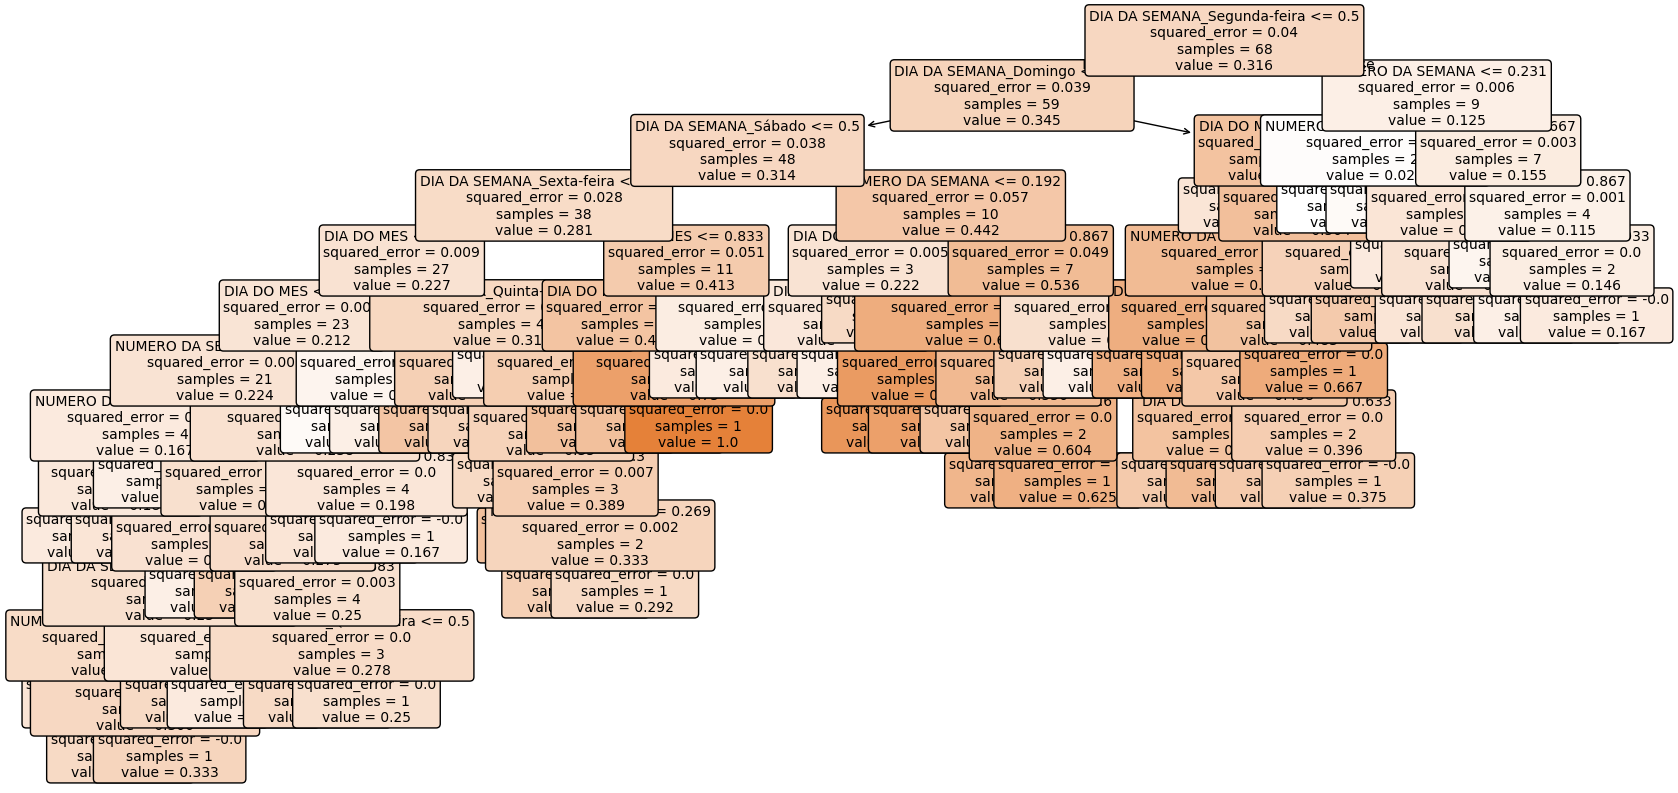

In [133]:
from sklearn.tree import plot_tree

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.show()


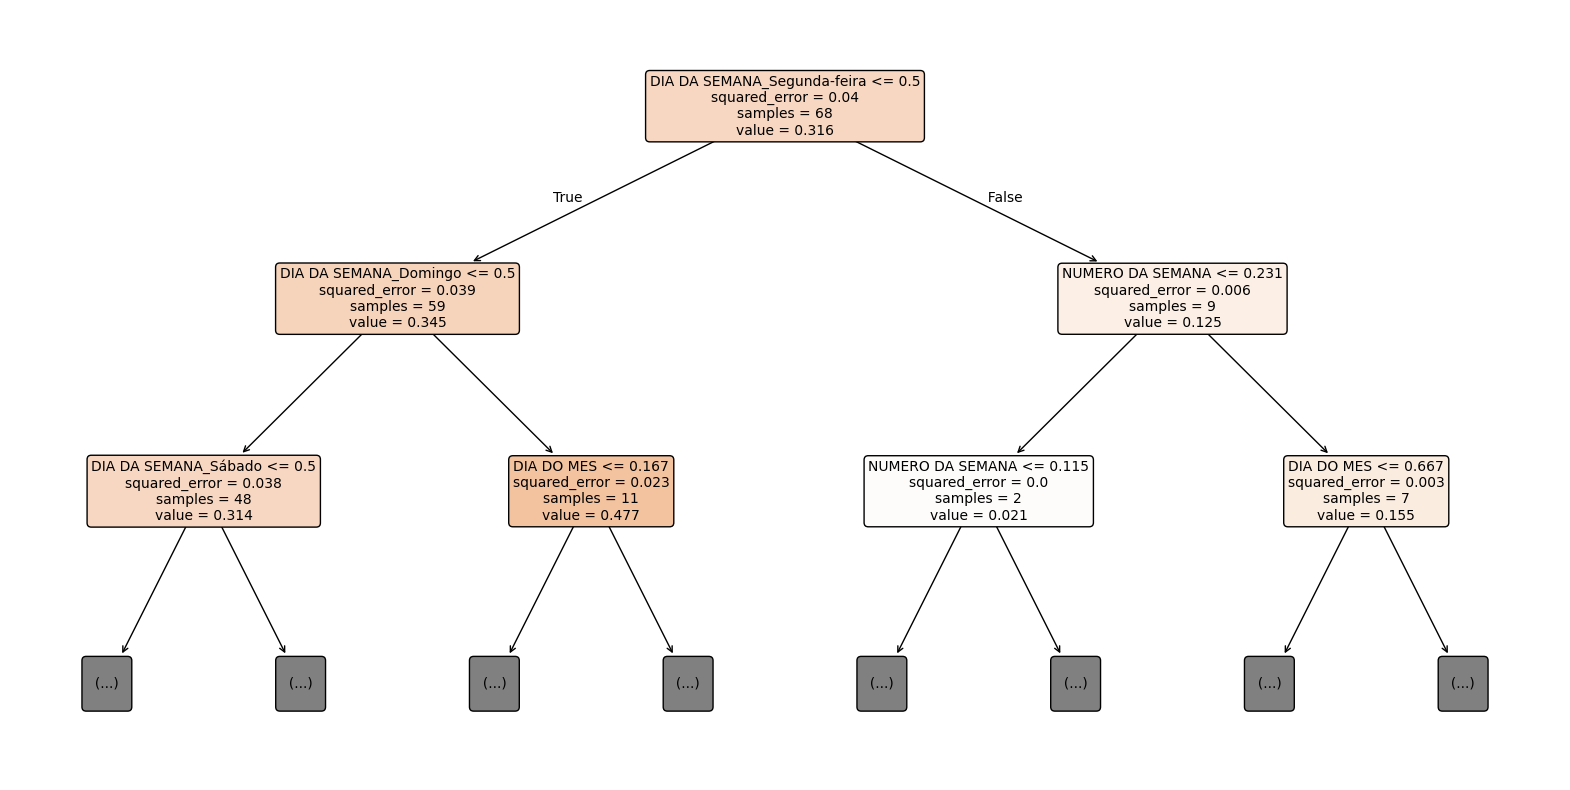

In [134]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, filled=True, rounded=True, fontsize=10, max_depth=2)
plt.show()

/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metr

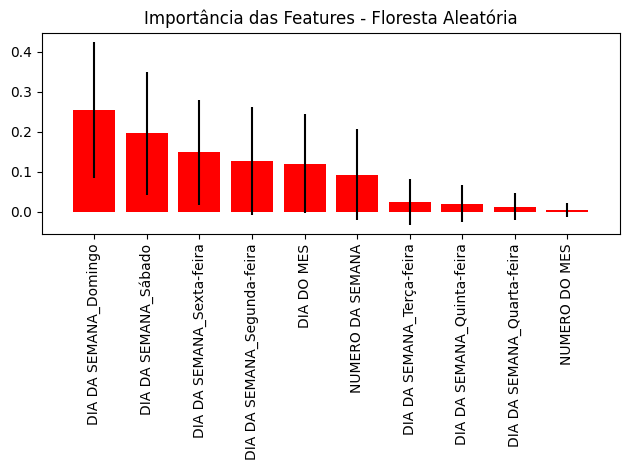

/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/marcobispo/Documents/desafio_datalakers-/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Regressão Linear,Random Forest,Árvore de Decisão
RMSE Treino,0.15,0.14,0.15
MAE Treino,0.12,0.10,0.11
RMSE Teste,0.20,0.19,0.19
MAE Teste,0.14,0.14,0.13


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df_model_quantidade.drop(columns=['QUANTIDADE'])
y = df_model_quantidade['QUANTIDADE'] 

# Guardar nomes das features
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Inicializar modelos
models = {
    'Regressão Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42)
}

# Parâmetros para Grid Search em Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Parâmetros para Grid Search em Árvore de Decisão
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

results = {}


for model_name, model in models.items():
    if model_name == 'Random Forest':
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    elif model_name == 'Árvore de Decisão':
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_dt, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    else:
        # Para Regressão Linear, não aplicamos Grid Search, então continuamos sem Grid Search
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        
        results[model_name] = {
            'RMSE Treino': rmse_train,
            'MAE Treino': mae_train,
            'RMSE Teste': rmse_test,
            'MAE Teste': mae_test
        }
        continue
    

    grid_search.fit(X_train, y_train)
    

    best_model = grid_search.best_estimator_

    best_model.fit(X_train, y_train)
    

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calcular métricas de avaliação com o melhor modelo
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    results[model_name] = {
        'RMSE Treino': rmse_train,
        'MAE Treino': mae_train,
        'RMSE Teste': rmse_test,
        'MAE Teste': mae_test
    }
    
    # Visualizar importância das features para a Floresta Aleatória
    if model_name == 'Random Forest':
        importances = best_model.feature_importances_
        std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
        indices = np.argsort(importances)[::-1]
        
        plt.figure()
        plt.title("Importância das Features - Floresta Aleatória")
        plt.bar(range(X.shape[1]), importances[indices],
                color="r", yerr=std[indices], align="center")
        plt.xticks(range(X.shape[1]), feature_names[indices], rotation='vertical')  # Rotaciona para melhor visualização
        plt.xlim([-1, X.shape[1]])
        plt.tight_layout()
        plt.show()

# Criar DataFrame com os resultados e formatar para duas casas decimais
df_results = pd.DataFrame(results).round(2)
df_results